# Exploratory Data Analysis

## REKT Database from DEFIYIELD

In [180]:
import pandas as pd             #pandas for using dataframe and reading csv file(s)
import json
import numpy as np              #numpy for vector operations and basic maths
import matplotlib.pyplot as plt #for plotting
%matplotlib inline              
import seaborn as sns           #for making plots
import math                     #for basic math operations
import warnings
# from pandas.plotting import parallel_coordinates #for multivariate plots
warnings.filterwarnings('ignore') #ignore deprecation warnings

In [181]:
#importing data

open_REKTjson = open('../../data/Raw Data/Python_REKT_Database_API/REKT_Database_Python_API.json')
load_REKTjson = json.load(open_REKTjson)
REKT_df = pd.DataFrame(load_REKTjson)

REKT_df.head(5) # visualize first 5 instances of raw data

,id,project_name,description,name_categories,token_name,proof_archive_link,technical_issue,token_address,logo_link,date,...,discord,bug_bounty_program_link,bug_bounty_program_company,audit_code_conf,is_verified_source_code,is_public_team,scam_type,network,scamNetworks,auditedBy
0,3058,Terra Classic,<p><strong>Quick Summary</strong></p><p>A comp...,Stablecoin,"LUNC, USTC",https://twitter.com/OnChainWizard/status/15241...,None,"0x7e43d25EaD96B1058f671F6690ea705BA2C7e5B9, 0x...",safe/files/scamDatabase/logo/62b31ccc0d07e.jpeg,2022-5-8,...,https://twitter.com/terra_money,None,None,0.0,0.0,1.0,{'type': 'Bank Run'},{},"[{'networks_id': 1003, 'scam_database_id': 305...",[{'audit_link': 'safe/files/audit/pdf/CertiK_A...
1,2762,Africrypt,<p><strong>Quick Summary</strong></p><p>Ameer ...,CeFi,None,None,None,None,safe/files/scamDatabase/logo/61e049352a11a.png,2021-6-23,...,None,None,None,NaN,0.0,1.0,{'type': 'Exit Scam'},{},"[{'networks_id': 1666600003, 'scam_database_id...",[]
2,2878,PlusToken,<p><strong>Quick Summary</strong></p><p>The pe...,CeFi,None,None,None,None,safe/files/scamDatabase/logo/62432b9d39213.png,2019-12-16,...,None,None,None,NaN,0.0,0.0,{'type': 'Exit Scam'},{},"[{'networks_id': 1666600003, 'scam_database_id...",[]
3,2861,Thodex,<p><strong>Quick Summary</strong></p><p>Thodex...,CeFi,None,None,None,None,safe/files/scamDatabase/logo/6241c6cb5dadc.jpeg,2021-4-22,...,None,None,None,NaN,0.0,0.0,{'type': 'Exit Scam'},{},"[{'networks_id': 1666600003, 'scam_database_id...",[]
4,2735,BitConnect,<p><strong>Quick Summary</strong></p><p>BitCon...,"Borrowing and Lending,CeFi",BCC,None,None,None,safe/files/scamDatabase/logo/61bb58e866760.jpeg,2018-1-15,...,None,None,None,NaN,0.0,0.0,{'type': 'Exit Scam'},{},"[{'networks_id': 1666600003, 'scam_database_id...",[]


In [182]:
REKT_df.tail(5) # visualize last 5 instances of raw data

,id,project_name,description,name_categories,token_name,proof_archive_link,technical_issue,token_address,logo_link,date,...,discord,bug_bounty_program_link,bug_bounty_program_company,audit_code_conf,is_verified_source_code,is_public_team,scam_type,network,scamNetworks,auditedBy
3050,78,BoobsFinance,None,None,BOOBS,None,None,0xf98f73350d083005079b6c3cda9c99cfdb668be7,safe/files/scamDatabase/logo/60d50974c47c8.png,None,...,None,None,None,NaN,NaN,NaN,{'type': None},{},"[{'networks_id': 56, 'scam_database_id': 78, '...",[]
3051,77,Chad Token,<p>The contract owner could disable the transf...,Token,CHAD,None,None,0x2f7383de70c972ef8c18565a9da023b08c110f2c,safe/files/scamDatabase/logo/60d508fa757bf.png,2021-3-8,...,None,None,None,NaN,NaN,NaN,{'type': 'Honeypot'},{},"[{'networks_id': 56, 'scam_database_id': 77, '...",[]
3052,76,Generate Finance,"<p><span data-sheets-userformat='{""2"":15165,""3...",None,GEN,None,None,0x04ad13a645748cee762f11e43386fe2a275885b4,safe/files/scamDatabase/logo/60d50819f1be1.jpeg,None,...,None,None,None,NaN,NaN,NaN,{'type': None},{},"[{'networks_id': 56, 'scam_database_id': 76, '...",[]
3053,72,Pill Finance,"<p><span data-sheets-userformat='{""2"":15165,""3...",None,RED-P,None,None,0x137faad0d13813ef8d4cbbb336f0e01066b2c9b4,safe/files/scamDatabase/logo/60d5003a01e5a.jpeg,None,...,None,None,None,NaN,NaN,NaN,{'type': None},{},"[{'networks_id': 56, 'scam_database_id': 72, '...",[]
3054,55,SoftdrinkSwap,<p>The team abandoned the project. The team st...,None,COLA SODA,None,None,0x740426e58a10ac3b6724f753c8468288248137f9,safe/files/scamDatabase/logo/60df352021e17.png,2020-11-12,...,None,None,None,NaN,NaN,NaN,{'type': 'Abandoned'},{},"[{'networks_id': 56, 'scam_database_id': 55, '...",[]


In [183]:
#finding out the shape of the data using "shape" variable: Output (rows, columns)
REKT_df.shape

(3055, 31)

In [184]:
#Printing all the columns present in data
REKT_df.columns

Index(['id', 'project_name', 'description', 'name_categories', 'token_name',
       'proof_archive_link', 'technical_issue', 'token_address', 'logo_link',
       'date', 'proof_link', 'website_link', 'webarchive_link', 'twitter_link',
       'telegram_link', 'our_post_link', 'funds_lost', 'funds_returned',
       'active', 'git_hub', 'git_hub_contract_link', 'discord',
       'bug_bounty_program_link', 'bug_bounty_program_company',
       'audit_code_conf', 'is_verified_source_code', 'is_public_team',
       'scam_type', 'network', 'scamNetworks', 'auditedBy'],
      dtype='object')

In [185]:
#Checking for NaN values present in data
REKT_df.isna().sum() # also REKT_df.isnull().sum()

id                               0
project_name                     0
description                    285
name_categories                770
token_name                     194
proof_archive_link            2815
technical_issue               3051
token_address                  209
logo_link                        0
date                          1876
proof_link                     190
website_link                  2220
webarchive_link               2830
twitter_link                  2518
telegram_link                 2628
our_post_link                 3016
funds_lost                    2286
funds_returned                2995
active                           0
git_hub                       2965
git_hub_contract_link         3028
discord                       2917
bug_bounty_program_link       3053
bug_bounty_program_company    3054
audit_code_conf               3032
is_verified_source_code       2513
is_public_team                2513
scam_type                        0
network             

In [186]:
# Removing spaces at beginning and at the end, if any, from column names
REKT_df.columns = REKT_df.columns.str.strip()

## Dropping Variables That Do Not Assist in Analysis

Most of the variables that we shall drop from our 31 columns are links to external sites, such as web archive, discord, and github. Moreover, these variables contain more than 2900 NaN values out of a total observation count of 3055. However, the variable proof_link could be important if I decide to scrape text data from the linked article about a crypto attack. We shall also get rid of the technical_issue field because it only contains 4 non-NaN values and, more importantly, does not have any insightful use. Therefore, I find it sensible to entirely remove these fields, instead of getting rid of their existing NaN values, for EDA and modeling purposes.

In [187]:
REKT_df.drop(columns={'technical_issue', 'proof_archive_link', 'logo_link', 'website_link', 'twitter_link', 'our_post_link', 'telegram_link', 'git_hub', 'git_hub_contract_link', 'discord', 'bug_bounty_program_link', 'bug_bounty_program_company', 'audit_code_conf'}, inplace=True)

REKT_df.shape

(3055, 18)

In [188]:
REKT_df.columns

Index(['id', 'project_name', 'description', 'name_categories', 'token_name',
       'token_address', 'date', 'proof_link', 'webarchive_link', 'funds_lost',
       'funds_returned', 'active', 'is_verified_source_code', 'is_public_team',
       'scam_type', 'network', 'scamNetworks', 'auditedBy'],
      dtype='object')

## Variable Identification and Typecasting

In [189]:
# A closer look at the data types present in the data
REKT_df.dtypes

id                           int64
project_name                object
description                 object
name_categories             object
token_name                  object
token_address               object
date                        object
proof_link                  object
webarchive_link             object
funds_lost                  object
funds_returned              object
active                       int64
is_verified_source_code    float64
is_public_team             float64
scam_type                   object
network                     object
scamNetworks                object
auditedBy                   object
dtype: object

There are a lot of variables visible at once, so let's narrow this down by looking **at one datatype at once**. We will start with **int64** data type.


### Integer Data Type

In [190]:
#Identifying variables with integer datatype
REKT_df.dtypes[REKT_df.dtypes == 'int64']

id        int64
active    int64
dtype: object

In [191]:
REKT_df['active'].value_counts()

1    3055
Name: active, dtype: int64

Summary:

*    **id** is a unique, nominal code indicating the token/coin associated with the crypto attack. Converting it to category type would not be beneficial due to the large number of unique tokens present in the database. **This variable should be converted to object/string type**. 

*    **active** most probably represents whether the crypto project is currently active in the market. I perused the API documentation to try to find this response variable's significance, but could not. Moreover, it has only taken on one as a value for ALL observations. This would mean that all crypto projects present in the database are still active. We could keep this variable for now, but **converting it to category would be better as it most likely would take on two values, either 1 (active) or 0 (inactive).**  

In [192]:
#Converting active to category datatype
REKT_df['active'] = REKT_df['active'].astype('category')
REKT_df['id'] = REKT_df['id'].astype('object')

REKT_df.dtypes

id                           object
project_name                 object
description                  object
name_categories              object
token_name                   object
token_address                object
date                         object
proof_link                   object
webarchive_link              object
funds_lost                   object
funds_returned               object
active                     category
is_verified_source_code     float64
is_public_team              float64
scam_type                    object
network                      object
scamNetworks                 object
auditedBy                    object
dtype: object

### Object Data Type

In [193]:
#Identifying variables with object datatype
REKT_df.dtypes[REKT_df.dtypes == 'object']

id                 object
project_name       object
description        object
name_categories    object
token_name         object
token_address      object
date               object
proof_link         object
webarchive_link    object
funds_lost         object
funds_returned     object
scam_type          object
network            object
scamNetworks       object
auditedBy          object
dtype: object

*    **Variables like 'date', 'funds_lost', and 'funds_returned' are of type object**. This means that **Pandas was not able to recognise the datatype** of these four variables. Therefore, we shall convert these aforementioned object data type variables to their respective datatype

In [194]:
REKT_df['funds_lost'].head(10)

0    40000000000
1     3600000000
2     2900000000
3     2000000000
4     2000000000
5     1000000000
6      625000000
7      602189570
8      534000000
9      473000000
Name: funds_lost, dtype: object

In [195]:
REKT_df['funds_returned'].head(10)

0         None
1         None
2         None
3         None
4     56000000
5         None
6    155800000
7    602189570
8    534000000
9         None
Name: funds_returned, dtype: object

In [196]:
#Converting the object data type variables to their respective datatype
REKT_df['funds_lost'] = REKT_df['funds_lost'].astype('float64')
REKT_df['funds_returned'] = REKT_df['funds_returned'].astype('float64')
REKT_df['date'] = pd.to_datetime(REKT_df['date'])

*    As can be seen above, we have converted 'id' and 'store_and_fwd_flag' to **category**. Due to the 'id' variable's format, we shall have to modify all of its values by removing the redundant 'id' part present in all values. We will also keep the 'id' variable as 'category', **since 'id' represents a unique identifier for each trip and most probably won't be used for analysis**. We change both 'pickup_datetime' and 'dropoff_datetime' to **datetime datatypes**. We will further investigate the datatime datatypes and extract more information from them.

In [197]:
REKT_df.dtypes

id                                 object
project_name                       object
description                        object
name_categories                    object
token_name                         object
token_address                      object
date                       datetime64[ns]
proof_link                         object
webarchive_link                    object
funds_lost                        float64
funds_returned                    float64
active                           category
is_verified_source_code           float64
is_public_team                    float64
scam_type                          object
network                            object
scamNetworks                       object
auditedBy                          object
dtype: object

### Float Data Type

In [198]:
# Identifying variables with float datatype
REKT_df.dtypes[REKT_df.dtypes == 'float64']

funds_lost                 float64
funds_returned             float64
is_verified_source_code    float64
is_public_team             float64
dtype: object

In [199]:
REKT_df['is_verified_source_code'].head(10)

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
5    0.0
6    0.0
7    0.0
8    0.0
9    0.0
Name: is_verified_source_code, dtype: float64

In [200]:
REKT_df['is_public_team'].head(10)

0    1.0
1    1.0
2    0.0
3    0.0
4    0.0
5    0.0
6    0.0
7    0.0
8    0.0
9    0.0
Name: is_public_team, dtype: float64

*    ***The funds variables should be float types. However, the is_verified_source_code and is_public_team variables take on the values of either 0 or 1. Hence, we convert them to category type.***

In [201]:
REKT_df['is_verified_source_code'] = REKT_df['is_verified_source_code'].astype('category')
REKT_df['is_public_team'] = REKT_df['is_public_team'].astype('category')

REKT_df.dtypes

id                                 object
project_name                       object
description                        object
name_categories                    object
token_name                         object
token_address                      object
date                       datetime64[ns]
proof_link                         object
webarchive_link                    object
funds_lost                        float64
funds_returned                    float64
active                           category
is_verified_source_code          category
is_public_team                   category
scam_type                          object
network                            object
scamNetworks                       object
auditedBy                          object
dtype: object

In [202]:
REKT_df.head()

,id,project_name,description,name_categories,token_name,token_address,date,proof_link,webarchive_link,funds_lost,funds_returned,active,is_verified_source_code,is_public_team,scam_type,network,scamNetworks,auditedBy
0,3058,Terra Classic,<p><strong>Quick Summary</strong></p><p>A comp...,Stablecoin,"LUNC, USTC","0x7e43d25EaD96B1058f671F6690ea705BA2C7e5B9, 0x...",2022-05-08,https://www.nansen.ai/research/on-chain-forens...,None,4.000000e+10,NaN,1,0.0,1.0,{'type': 'Bank Run'},{},"[{'networks_id': 1003, 'scam_database_id': 305...",[{'audit_link': 'safe/files/audit/pdf/CertiK_A...
1,2762,Africrypt,<p><strong>Quick Summary</strong></p><p>Ameer ...,CeFi,None,None,2021-06-23,https://finance.yahoo.com/news/africrypt-bitco...,https://web.archive.org/web/20200921145240/htt...,3.600000e+09,NaN,1,0.0,1.0,{'type': 'Exit Scam'},{},"[{'networks_id': 1666600003, 'scam_database_id...",[]
2,2878,PlusToken,<p><strong>Quick Summary</strong></p><p>The pe...,CeFi,None,None,2019-12-16,https://cointelegraph.com/news/vanuatu-extradi...,https://web.archive.org/web/20220125033211/htt...,2.900000e+09,NaN,1,0.0,0.0,{'type': 'Exit Scam'},{},"[{'networks_id': 1666600003, 'scam_database_id...",[]
3,2861,Thodex,<p><strong>Quick Summary</strong></p><p>Thodex...,CeFi,None,None,2021-04-22,https://www.cnbc.com/2021/04/23/bitcoin-btc-ce...,https://web.archive.org/web/20220405133149/htt...,2.000000e+09,NaN,1,0.0,0.0,{'type': 'Exit Scam'},{},"[{'networks_id': 1666600003, 'scam_database_id...",[]
4,2735,BitConnect,<p><strong>Quick Summary</strong></p><p>BitCon...,"Borrowing and Lending,CeFi",BCC,None,2018-01-15,None,https://web.archive.org/web/20220426131429/htt...,2.000000e+09,56000000.0,1,0.0,0.0,{'type': 'Exit Scam'},{},"[{'networks_id': 1666600003, 'scam_database_id...",[]


### datetime Data Type

*    ***We shall now extract important time-based features for better EDA experience***

In [203]:
# create time based features for pickup_datetime 
REKT_df['month_of_attack'] = REKT_df.date.dt.month
REKT_df['day_of_attack'] = REKT_df.date.dt.dayofweek
REKT_df['day_of_year_of_attack'] = REKT_df.date.dt.dayofyear

In [204]:
REKT_df.head()

,id,project_name,description,name_categories,token_name,token_address,date,proof_link,webarchive_link,funds_lost,...,active,is_verified_source_code,is_public_team,scam_type,network,scamNetworks,auditedBy,month_of_attack,day_of_attack,day_of_year_of_attack
0,3058,Terra Classic,<p><strong>Quick Summary</strong></p><p>A comp...,Stablecoin,"LUNC, USTC","0x7e43d25EaD96B1058f671F6690ea705BA2C7e5B9, 0x...",2022-05-08,https://www.nansen.ai/research/on-chain-forens...,None,4.000000e+10,...,1,0.0,1.0,{'type': 'Bank Run'},{},"[{'networks_id': 1003, 'scam_database_id': 305...",[{'audit_link': 'safe/files/audit/pdf/CertiK_A...,5.0,6.0,128.0
1,2762,Africrypt,<p><strong>Quick Summary</strong></p><p>Ameer ...,CeFi,None,None,2021-06-23,https://finance.yahoo.com/news/africrypt-bitco...,https://web.archive.org/web/20200921145240/htt...,3.600000e+09,...,1,0.0,1.0,{'type': 'Exit Scam'},{},"[{'networks_id': 1666600003, 'scam_database_id...",[],6.0,2.0,174.0
2,2878,PlusToken,<p><strong>Quick Summary</strong></p><p>The pe...,CeFi,None,None,2019-12-16,https://cointelegraph.com/news/vanuatu-extradi...,https://web.archive.org/web/20220125033211/htt...,2.900000e+09,...,1,0.0,0.0,{'type': 'Exit Scam'},{},"[{'networks_id': 1666600003, 'scam_database_id...",[],12.0,0.0,350.0
3,2861,Thodex,<p><strong>Quick Summary</strong></p><p>Thodex...,CeFi,None,None,2021-04-22,https://www.cnbc.com/2021/04/23/bitcoin-btc-ce...,https://web.archive.org/web/20220405133149/htt...,2.000000e+09,...,1,0.0,0.0,{'type': 'Exit Scam'},{},"[{'networks_id': 1666600003, 'scam_database_id...",[],4.0,3.0,112.0
4,2735,BitConnect,<p><strong>Quick Summary</strong></p><p>BitCon...,"Borrowing and Lending,CeFi",BCC,None,2018-01-15,None,https://web.archive.org/web/20220426131429/htt...,2.000000e+09,...,1,0.0,0.0,{'type': 'Exit Scam'},{},"[{'networks_id': 1666600003, 'scam_database_id...",[],1.0,0.0,15.0


In [205]:
REKT_df.tail()

,id,project_name,description,name_categories,token_name,token_address,date,proof_link,webarchive_link,funds_lost,...,active,is_verified_source_code,is_public_team,scam_type,network,scamNetworks,auditedBy,month_of_attack,day_of_attack,day_of_year_of_attack
3050,78,BoobsFinance,None,None,BOOBS,0xf98f73350d083005079b6c3cda9c99cfdb668be7,NaT,None,None,NaN,...,1,NaN,NaN,{'type': None},{},"[{'networks_id': 56, 'scam_database_id': 78, '...",[],NaN,NaN,NaN
3051,77,Chad Token,<p>The contract owner could disable the transf...,Token,CHAD,0x2f7383de70c972ef8c18565a9da023b08c110f2c,2021-03-08,None,None,NaN,...,1,NaN,NaN,{'type': 'Honeypot'},{},"[{'networks_id': 56, 'scam_database_id': 77, '...",[],3.0,0.0,67.0
3052,76,Generate Finance,"<p><span data-sheets-userformat='{""2"":15165,""3...",None,GEN,0x04ad13a645748cee762f11e43386fe2a275885b4,NaT,https://twitter.com/WARONRUGS/status/136972604...,None,NaN,...,1,NaN,NaN,{'type': None},{},"[{'networks_id': 56, 'scam_database_id': 76, '...",[],NaN,NaN,NaN
3053,72,Pill Finance,"<p><span data-sheets-userformat='{""2"":15165,""3...",None,RED-P,0x137faad0d13813ef8d4cbbb336f0e01066b2c9b4,NaT,https://twitter.com/RugSteemer/status/13717216...,https://archive.ph/AfyEo,NaN,...,1,NaN,NaN,{'type': None},{},"[{'networks_id': 56, 'scam_database_id': 72, '...",[],NaN,NaN,NaN
3054,55,SoftdrinkSwap,<p>The team abandoned the project. The team st...,None,COLA SODA,0x740426e58a10ac3b6724f753c8468288248137f9,2020-11-12,None,None,NaN,...,1,NaN,NaN,{'type': 'Abandoned'},{},"[{'networks_id': 56, 'scam_database_id': 55, '...",[],11.0,3.0,317.0


In [206]:
REKT_df.dtypes

id                                 object
project_name                       object
description                        object
name_categories                    object
token_name                         object
token_address                      object
date                       datetime64[ns]
proof_link                         object
webarchive_link                    object
funds_lost                        float64
funds_returned                    float64
active                           category
is_verified_source_code          category
is_public_team                   category
scam_type                          object
network                            object
scamNetworks                       object
auditedBy                          object
month_of_attack                   float64
day_of_attack                     float64
day_of_year_of_attack             float64
dtype: object

In [207]:
REKT_df.describe()

,funds_lost,funds_returned,month_of_attack,day_of_attack,day_of_year_of_attack
count,7.690000e+02,6.000000e+01,1179.000000,1179.000000,1179.000000
mean,7.915904e+07,3.961377e+07,7.302799,2.572519,207.167091
std,1.455806e+09,1.155030e+08,3.109340,1.948956,95.505989
min,1.600000e+01,4.440000e+03,1.000000,0.000000,1.000000
25%,4.776500e+04,4.911965e+05,5.000000,1.000000,146.000000
50%,3.510640e+05,2.758203e+06,8.000000,3.000000,239.000000
75%,3.000000e+06,7.517699e+06,9.000000,4.000000,263.000000
max,4.000000e+10,6.021896e+08,12.000000,6.000000,366.000000


*   Now we are done breaking down the date of attack datetime variable into granular forms, as seen above, which will **help us better analyze crypto crimes.** We are also done with the Variable identification and typecasting process and will now start the Univariate Analysis portion of the EDA, followed by Bivariate Analysis, and, lastly, Multivariate Analysis.

## Renaming Columns

In [208]:
REKT_df.rename(columns={"date": "attack_date", "funds_returned": "funds_returned_USD", "funds_lost":"funds_lost_USD"}, inplace=True)


## Dealing With Missing Values

A reason why I have chosen not to 

## Univariate Analysis: Numerical Variables

In [209]:
# Numerical datatypes
REKT_df.select_dtypes(include=['int64','float64','Int64']).dtypes

funds_lost_USD           float64
funds_returned_USD       float64
month_of_attack          float64
day_of_attack            float64
day_of_year_of_attack    float64
dtype: object

In [210]:
# segregating variables into groups
funds = ['funds_lost_USD','funds_returned_USD']
attack_dates = ['day_of_attack','month_of_attack', 'day_of_year_of_attack']

In [178]:
# REKT_df.funds_lost_USD.fillna(value=0, inplace=True)
# REKT_df.funds_returned_USD.fillna(value=0, inplace=True)

In [211]:
# custom function for easy and efficient analysis of numerical univariate

def UVA_numeric(data, var_group):
  '''
  Univariate_Analysis_numeric
  takes a group of variables (INTEGER and FLOAT) and plot/print all the descriptives and properties along with KDE.

  Runs a loop: calculate all the descriptives of i(th) variable and plot/print it
  '''

  size = len(var_group)
  plt.figure(figsize = (7*size,3), dpi = 140)
  
  #looping for each variable
  for j,i in enumerate(var_group):
    
    # calculating descriptives of variable
    mini = data[i].min()
    maxi = data[i].max()
    ran = data[i].max()-data[i].min()
    mean = data[i].mean()
    median = data[i].median()
    mode = data[i].mode()
    st_dev = data[i].std()
    skew = data[i].skew()
    kurt = data[i].kurtosis()

    # calculating points of standard deviation
    points = mean-st_dev, mean+st_dev

    #Plotting the variable with every information
    plt.subplot(1,size,j+1)
    sns.kdeplot(data[i], shade=True)
    sns.lineplot(points, [0,0], color = 'black', label = "std_dev")
    sns.scatterplot([mini,maxi], [0,0], color = 'orange', label = "min/max")
    sns.scatterplot([mean], [0], color = 'red', label = "mean")
    sns.scatterplot([median], [0], color = 'blue', label = "median")
    sns.scatterplot([mode], [0], color = 'green', label = "mode")
    plt.xlabel('{}'.format(i), fontsize = 20)
    plt.ylabel('density')
    plt.title('std_dev = {}; kurtosis = {};\nskew = {}; range = {}\nmean = {}; median = {}'.format((round(points[0],2),round(points[1],2)),
                                                                                                   round(kurt,2),
                                                                                                   round(skew,2),
                                                                                                   (round(mini,2),round(maxi,2),round(ran,2)),
                                                                                                   round(mean,2),
                                                                                                   round(median,2)))
                                                                                           

### Moments of Funds variables

TypeError: unhashable type: 'Series'

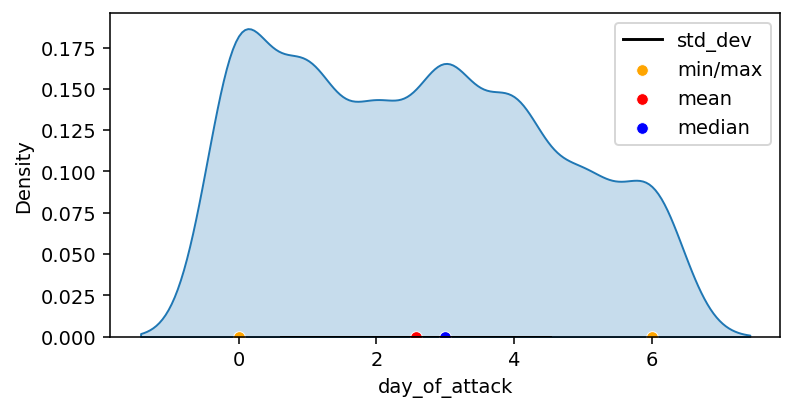

In [213]:
UVA_numeric(REKT_df,attack_dates)

**Summary of pickup_dropoff_location:**

*    **pickup_longitude and dropoff_longitude**:
    *    Median = -73.98
    *    **Both are centered around -74 to -73**
    *    **-444.22 <= skewness <= -449.89**  : both are **significantly left or negatively skewed** 
    *    **306781 <= kurtosis <= 309925.36**; As seen by the values, the distributions are highly leptokurtic. In essence, extreme values and Outliers are very likely to be present in both features.

*    **pickup_latitude and dropoff_latitude**:
    *    Median = 40.75
    *    **Both are centered around 40.5 to 41.5**
    *    **skewness**  : both have completely opposite skewness, with pickup_latitude having a right or positive skew and dropoff_latitude with a left or negative skew. This is because of very distant pickup and dropoff locations, which lead to extreme values for trip duration. Both are **significantly skewed too**.
    *    **19348.41 <= kurtosis <= 5639.24**; As seen by the values, the distributions are highly leptokurtic. In essence, extreme values and Outliers are very likely to be present in both features.

**Things to Investigate Further down the road:**
*   ***Even though outliers present, DO NOT REMOVE THEM**

*   ***Keeping the above point in mind, we can move ahead to remove these Outliers in the pickup_dropoff_location group and visualize these plots again to gain a better understanding of the distributions.***

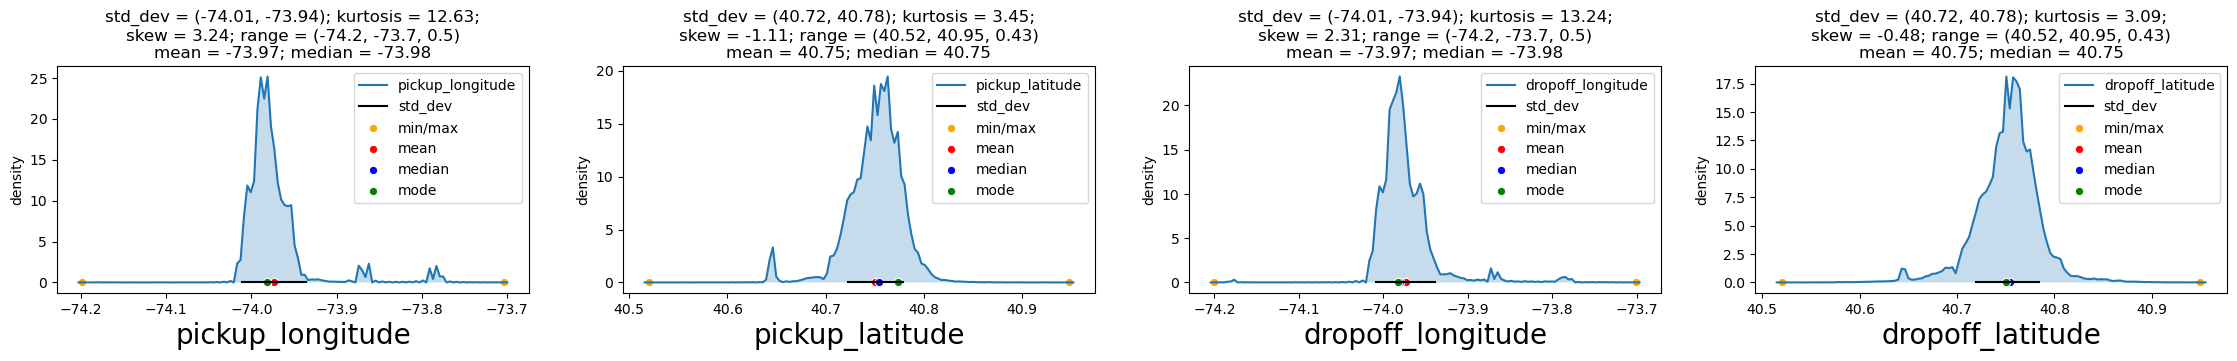

In [39]:
UVA_numeric(pdl_data,pickup_dropoff_location)

**Final Summary of pickup_dropoff_location:**

*    From the above KDE plots, we can conclude that the removal of outlier values from both latitude and longitudinal data did lower skewness and kurtosis by a big margin. Moreover, in the process we lost few amount of observations (729322-728194 = 1128), which would not hinder further EDA analysis, but provide a better picture.

*    Therefore, we can put the following limits on latitudinal and longitudinal data:
     *    Latitudinal data range should be between 40.6 to 40.95
     *    Longitude data range be between -74.2 to -73.70

**Things to Investigate Further in EDA:**
*    Removal of the extreme values and Outliers in the dataset by following the limits we have set
*    Trip durations relation with outlier values of all features associated with the pickup_dropoff_location group

### trip_details

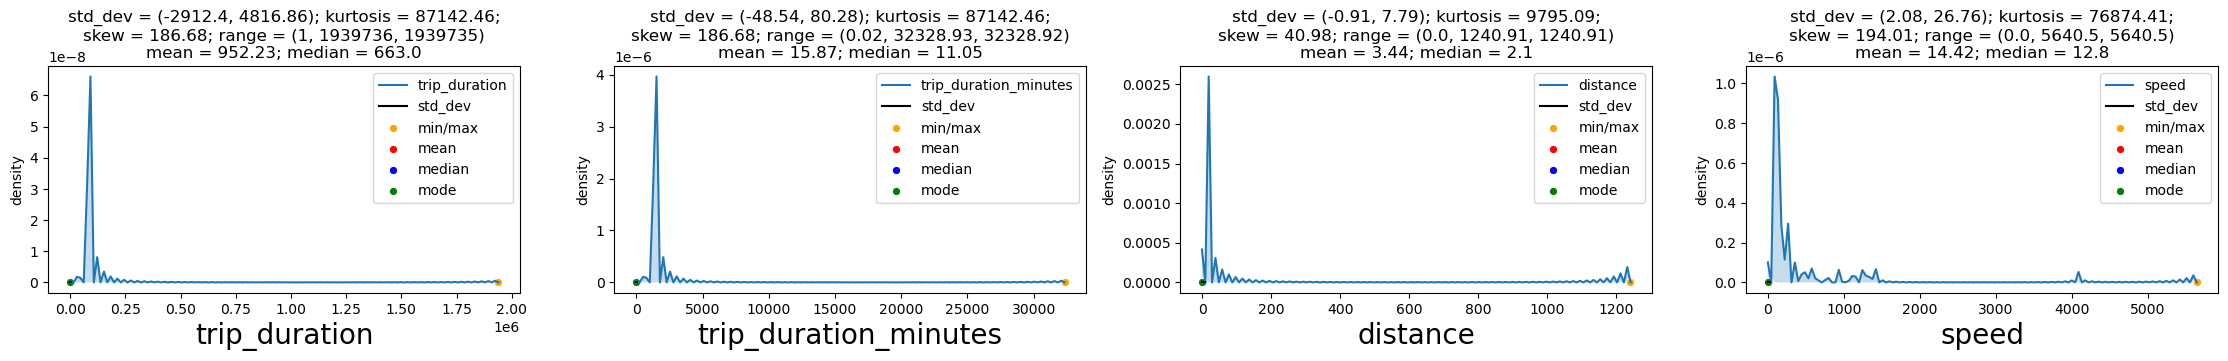

In [40]:
UVA_numeric(data,trip_details)

In [41]:
data.distance[data.distance == 0 ].count()

2901

**Summary of trip_details:**

*    **trip_duration_minutes**:
    *    trip_duration uses the seconds unit to denote the duration and, hence, for convenience we shall be analyzing trip_duration_minutes
    *    Median = 11.05 minutes
    *    skewness for both trip_duration and trip_duration_minutes are bound to be the same and are **significantly right or positively skewed** 
    *    kurtosis value too is bound to be the same for both and is 87142.46. As seen by the values, the distributions are highly leptokurtic. In essence, extreme values and Outliers are very likely to be present in both features. For example, we see values greater than 5000 minutes or, in other words, trips that went on for more than 3 days.
    *    An important point to keep in mind is that **NYC is renowned for traffic and congestion, which would add a hefty amount to trip_duration even for short distances**. Hence, when considering dealing with outliers, we shall be more careful of considering this factor and be a bit more lenient in removing these outliers.
    *    Another key point to note is that there exist several trips that have durations of 0 seconds or 0 minutes 
    
    
*    **distance (Note: represented in km)**:
    *    Median = 2.1 km
    *    An interesting find is that the **minimum value associated with distance is 0 and there are 2901 observations with distance = 0.** This could denote the following: drop off location is same as the pickup location, customer could've cancelled the trip right after booking/confirming it or driver could've also cancelled the trip after confirming it, **connectivity or software issues with held-in vehicle memory (this can be analyzed further in the Bivariate Analysis section with the feature store_and_fwd_flag). This finding will also be analyzed further in relation to the trip duration features to extract more convincing information.**
    *    **skewness = 40.98**  : **significantly right or positively skewed**, just like both trip duration features as expected.
    *    **kurtosis = 9795.09**; The distribution is highly leptokurtic. In essence, extreme values and Outliers are very likely to be present in both features. 
    *    According to internet sources, most NYC taxi cabs do not travel outside city limits; however, **some cabs do occasionally take riders to New Jersey and also have the right to refuse for doing so.** These rides from NYC to New Jersey involve riders negotiating prices with the cab drivers and it often ends up being very expensive, as the driver has to return to NYC without a fare and, hence, riders have to pay a two-way fare. 
    *    **The distance from NYC to New Jersey is about 74 miles or 119 kilometres, which suprisingly translates to about a difference of 1 latitude degree!** Therefore, it can be safe to conclude that trips greater than 120 kilometres can be considered as outliers. Moreover, it's illegal for taxi drivers to refuse a fare in any of NYC's five boroughs


*    **speed (Note: represented in km/hr)**:
    *    Median = 12.8 km/hr
    *    **skewness = 194.01**  : **significantly right or positively skewed**, just like both trip duration features as expected.
    *    **kurtosis = 76874.41**; The distribution is highly leptokurtic. In essence, extreme values and Outliers are very likely to be present in both features. For example, we see speed values of much more than 200km/hr in the dataset and these values
    *    According to the NYC.gov website, **the speed limit in NYC (citywide) is 25 miles per hour (mph) or 40 km/hr, unless otherwise posted, and the speed limit on New York State highways (statewide) is 55 mph or 88.5 km/hr, unless otherwise posted.** However, the highest posted speed limit in New York is 65 mph or 105 km/hr, found only on limited-access freeways. Therefore, we can safely conclude that all speeds greater than 105 km/hr be treated as outliers. 

**Things to Investigate Further down the road:**
*    Removal of the extreme values and Outliers, as can be seen in the skewness and kurtosis values 
*   ***Keeping the above summary details in mind, we can move ahead to remove these Outliers in the trip_details group and visualize these plots again to gain a better understanding of the distributions.***

In [42]:
# copying trip_details
td_data = data[trip_details]

# filtering all trip_details variables using loc
td_data = td_data.loc[(td_data.trip_duration < 7200)]
td_data = td_data.loc[(td_data.trip_duration_minutes < 120)]
td_data = td_data.loc[(td_data.distance < 150)]
td_data = td_data.loc[(td_data.speed < 105)]

# checking how many points are removed
len(data), len(td_data)

(729322, 728150)

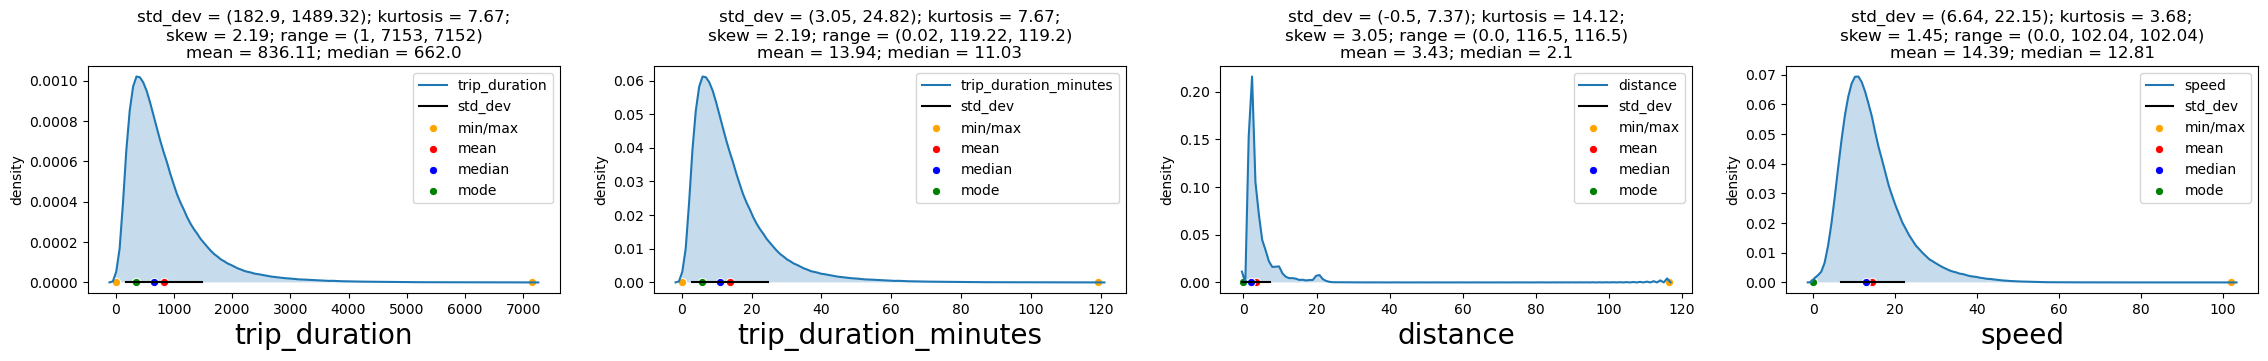

In [43]:
UVA_numeric(td_data,trip_details)

**Final Summary of trip_details:**

*    From the above KDE plots, we can conclude that the removal of certain outlier values, as discussed above, from trip_details group did lower skewness and kurtosis by a big margin. Moreover, in the process we lost few amount of observations (729322-728226 = 1096), which would not hinder further EDA analysis, but provide a better picture.

*    However, we should note from all these KDE plots above that **the distributions are still right or positively skewed as well as leptokurtic. The removal of outliers in the original trip_details data, with respect to restrictions set by the NYC government, did still result in few outliers in the new KDE plots**. Therefore, this signifies that we can **better our performance on the EDA process by being stricter with outlier removal, in terms of removing those observations of interstate travel (NYC to NJ), and still not lose key or essential insights that can be generated**. 

*    Therefore, we can put the following limits on trip_details features:
     *    **trip_duration_minutes data range can be reduced from 1 minute to 60 minutes and trip_duration data range can be reduced from 1 second (impractical but we'll use it) to 3600 seconds.**
     *    **distance data range could be reduced from 1 km to 40 km and speed data range can be reduced from 1 km/hr (impractical but we'll use it) to 55 km/hr.** 
     *    **These restrictions or removal of outliers in this method basically signifies that we shall be concentrating mainly on those trips within the 5 boroughs of NYC, as the data suggests, including some leeway for traffic.**

**Things to Investigate Further in EDA:**
*    Removal of the extreme values and Outliers in the dataset by following the limits we have set
*    Trip durations relation with outlier values of all features associated with the pickup_dropoff_location group

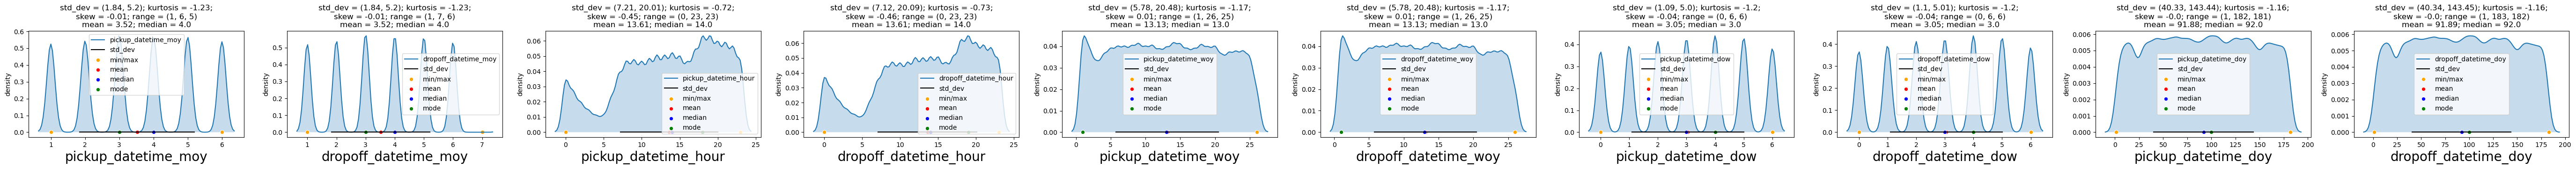

In [51]:
#Plotting the distributions again to see the effect of replacing incorrect values
UVA_numeric(data,pickup_dropoff_time) 

## Univariate Analysis : Categorical Variables

In [217]:
REKT_df.select_dtypes(exclude=['int64','float64','Int64']).dtypes

id                                 object
project_name                       object
description                        object
name_categories                    object
token_name                         object
token_address                      object
attack_date                datetime64[ns]
proof_link                         object
webarchive_link                    object
active                           category
is_verified_source_code          category
is_public_team                   category
scam_type                          object
network                            object
scamNetworks                       object
auditedBy                          object
dtype: object

**The useful variables here are passenger_count, vendor_id and store_and_fwd_flag. Since they are singular and belong to different groups, we will not group them and use them as is, unlike the approach we applied for Numerical Variables.**

In [218]:
# Custom function for easy visualisation of Categorical Variables
def UVA_variable(data, var):

  '''
  Univariate_Analysis_categorical
  takes a categorical variable and plots/prints all the value_counts and a barplot.
  '''
  # setting figure_size
  size = len(var)
  plt.figure(figsize = (7*size,5), dpi = 100)

  # for every variable
  for j,i in enumerate(var):
    norm_count = data[i].value_counts(normalize = True)
    n_uni = data[i].nunique()

  #Plotting the variable with every information
    plt.subplot(1,size,j+1)
    sns.barplot(norm_count, norm_count.index , order = norm_count.index)
    plt.xlabel('fraction/percent', fontsize = 20)
    plt.ylabel('{}'.format(i), fontsize = 20)
    plt.title('n_uniques = {} \n value counts \n {};'.format(n_uni,norm_count))

### passenger_count

In [219]:
UVA_variable(REKT_df, ['scam_type'])

TypeError: unhashable type: 'dict'

<Figure size 700x500 with 0 Axes>

**Summary of passenger_count:**

*    **passenger_count**:
    *    Median Number of Passengers in a Taxi = 1
    *    **Most taxis, roughly 85%, carry 1-2 passengers**
    *    **skewness must be positive**, as passenger_count is **significantly biased towards lesser number of passengers** and this seems logical too
    *    **kurtosis must be high too**; The distribution, thus, is leptokurtic. In essence, extreme values and Outliers are very likely to be present in passenger_count, as seen by values greater than 6. 


**Things to Investigate Further down the road:**
*    Removal of the extreme values and Outliers, as can be seen in the range of the distribution (0 minimum - 9 maximum). passenger_count values that are 0,7, and 9 can be dropped because their counts compared to the rest in the dataset is very trivial.
*    As per the NYC.gov website, the maximum amount of passengers allowed in a yellow taxicab by law is four in a four passenger taxicab or five passengers in a five passenger taxicab, except that an additional passenger must be accepted if such a passenger is under the age of seven and is held on the lap of an adult passenger seated in the rear. 
*   Therefore, we can assume that **6 passengers, at maximum, can ride in a NYC taxi i.e. 5 adults + 1 minor.**
*   ***Keeping the above point in mind, we can move ahead to remove these Outliers of passenger_count and visualize these plots again to gain a better understanding of the distribution of passenger_count. This will be seen in the section named Univariate Analyis: Outliers***

### vendor_id

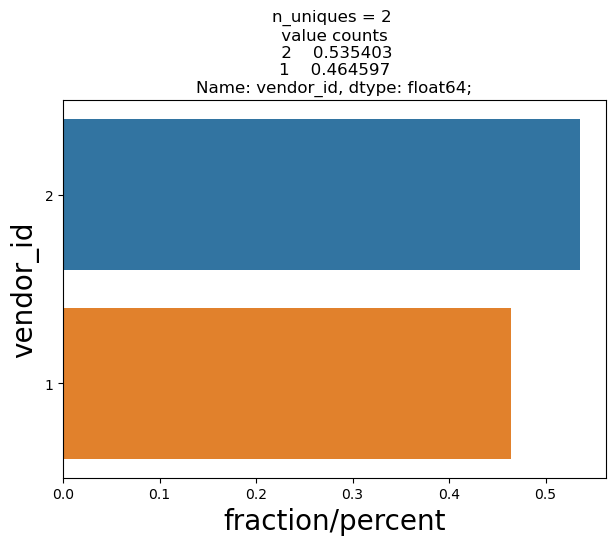

In [55]:
UVA_variable(data, ['vendor_id'])

**Summary**

* vendor_id:
  *  About 53.5% of vendors belong to vendor 2 and the rest to vendor 1.

**Things to investigate further down:**
* Relation between vendor_id with distance travelled, trip duration, variables in pickup_time group, and passenger counts for taxis of both vendors

### store_and_fwd_flag

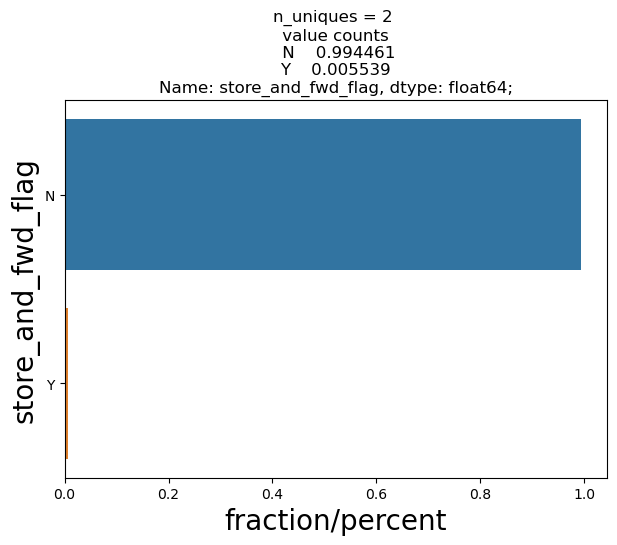

In [56]:
UVA_variable(data, ['store_and_fwd_flag'])

**Summary**

* store_and_fwd_flag:
  *  Almost a full majority of trip records were not held in-vehicle memory before sending to the vendor because the vehicle did not have a connection to the server.

**Things to investigate further down:**
* Relation between store_and_fwd_flag or flag type with distance travelled, trip duration, variables in pickup_time group, and passenger counts.

## Univariate: Missing Values

In [57]:
data.isna().sum()

id                       0
vendor_id                0
pickup_datetime          0
dropoff_datetime         0
passenger_count          0
pickup_longitude         0
pickup_latitude          0
dropoff_longitude        0
dropoff_latitude         0
store_and_fwd_flag       0
trip_duration            0
trip_duration_minutes    0
distance                 0
speed                    0
pickup_datetime_moy      0
pickup_datetime_hour     0
pickup_datetime_woy      0
pickup_datetime_dow      0
pickup_datetime_doy      0
dropoff_datetime_moy     0
dropoff_datetime_hour    0
dropoff_datetime_woy     0
dropoff_datetime_dow     0
dropoff_datetime_doy     0
dtype: int64

## Univariate Analysis: Outliers 

In [58]:
# custom function for easy outlier analysis

def UVA_outlier(data, var_group, include_outlier = True):
  '''
  Univariate_Analysis_outlier:
  takes a group of variables (INTEGER and FLOAT) and plot/print boplot and descriptives
  Runs a loop: calculate all the descriptives of i(th) variable and plot/print it 

  data : dataframe from which to plot from\n
  var_group : {list} type Group of Continuous variables
  include_outlier : {bool} whether to include outliers or not, default = True
  '''

  size = len(var_group)
  plt.figure(figsize = (10*size,8), dpi = 200)
  
  #looping for each variable
  for j,i in enumerate(var_group):
    
    # calculating descriptives of variable
    quant25 = data[i].quantile(0.25)
    quant75 = data[i].quantile(0.75)
    IQR = quant75 - quant25
    med = data[i].median()
    whis_low = med-(1.5*IQR)
    whis_high = med+(1.5*IQR)

    # Calculating Number of Outliers
    outlier_high = len(data[i][data[i]>whis_high])
    outlier_low = len(data[i][data[i]<whis_low])

    if include_outlier == True:
      print(include_outlier)
      #Plotting the variable with every information
      plt.subplot(1,size,j+1)
      sns.boxplot(data[i], orient="v")
      plt.ylabel('{}'.format(i))
      plt.title('With Outliers\nOutlier (low/high) = {} \n'.format((outlier_low,outlier_high)))
                                                                                                   
      
    else:
      # replacing outliers with max/min whisker
      data2 = data[var_group][:]
      data2[i][data2[i]>whis_high] = whis_high+1
      data2[i][data2[i]<whis_low] = whis_low-1
      
      quant25 = data2[i].quantile(0.25)
      quant75 = data2[i].quantile(0.75)
      IQR = quant75 - quant25
      med = data2[i].median()
      whis_low = med-(1.5*IQR)
      whis_high = med+(1.5*IQR)
      outlier_high = len(data2[i][data2[i]>whis_high])
      outlier_low = len(data2[i][data2[i]<whis_low])
    
      # plotting without outliers
      plt.subplot(1,size,j+1)
      sns.boxplot(data2[i], orient="v")
      plt.ylabel('{}'.format(i))
      plt.title('Without Outliers\nIQR = {}; Median = {} \n 2nd,3rd  quartile = {};\n'.format(round(IQR,2),
                                                                                                   round(med,2),
                                                                                                   (round(quant25,2),round(quant75,2))
                                                                                                   ))

### passenger_count

True


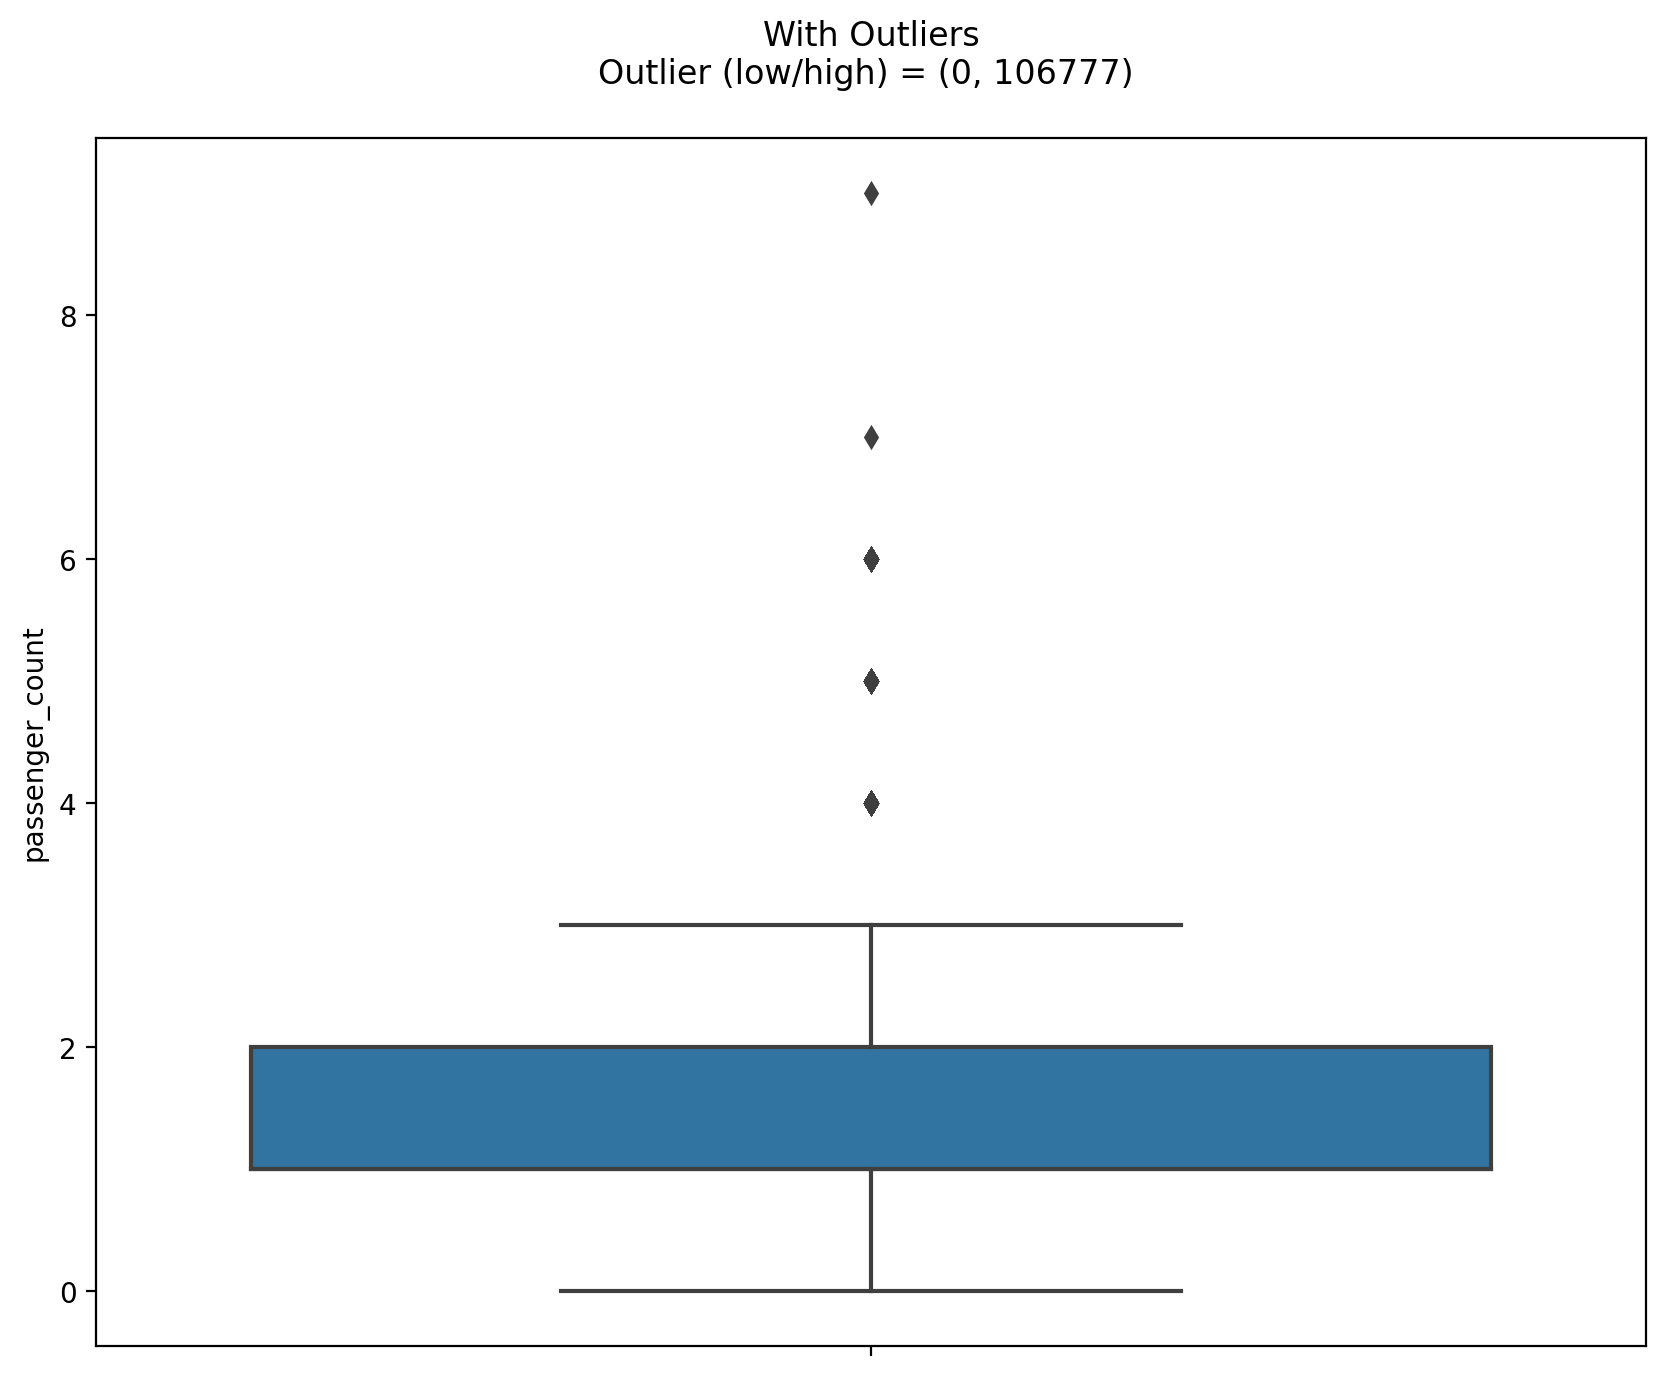

In [59]:
#changing passenger_count to integer datatype only for this section to work with the function 
data['passenger_count'] = data['passenger_count'].astype('int64')
UVA_outlier(data, ['passenger_count'],) 

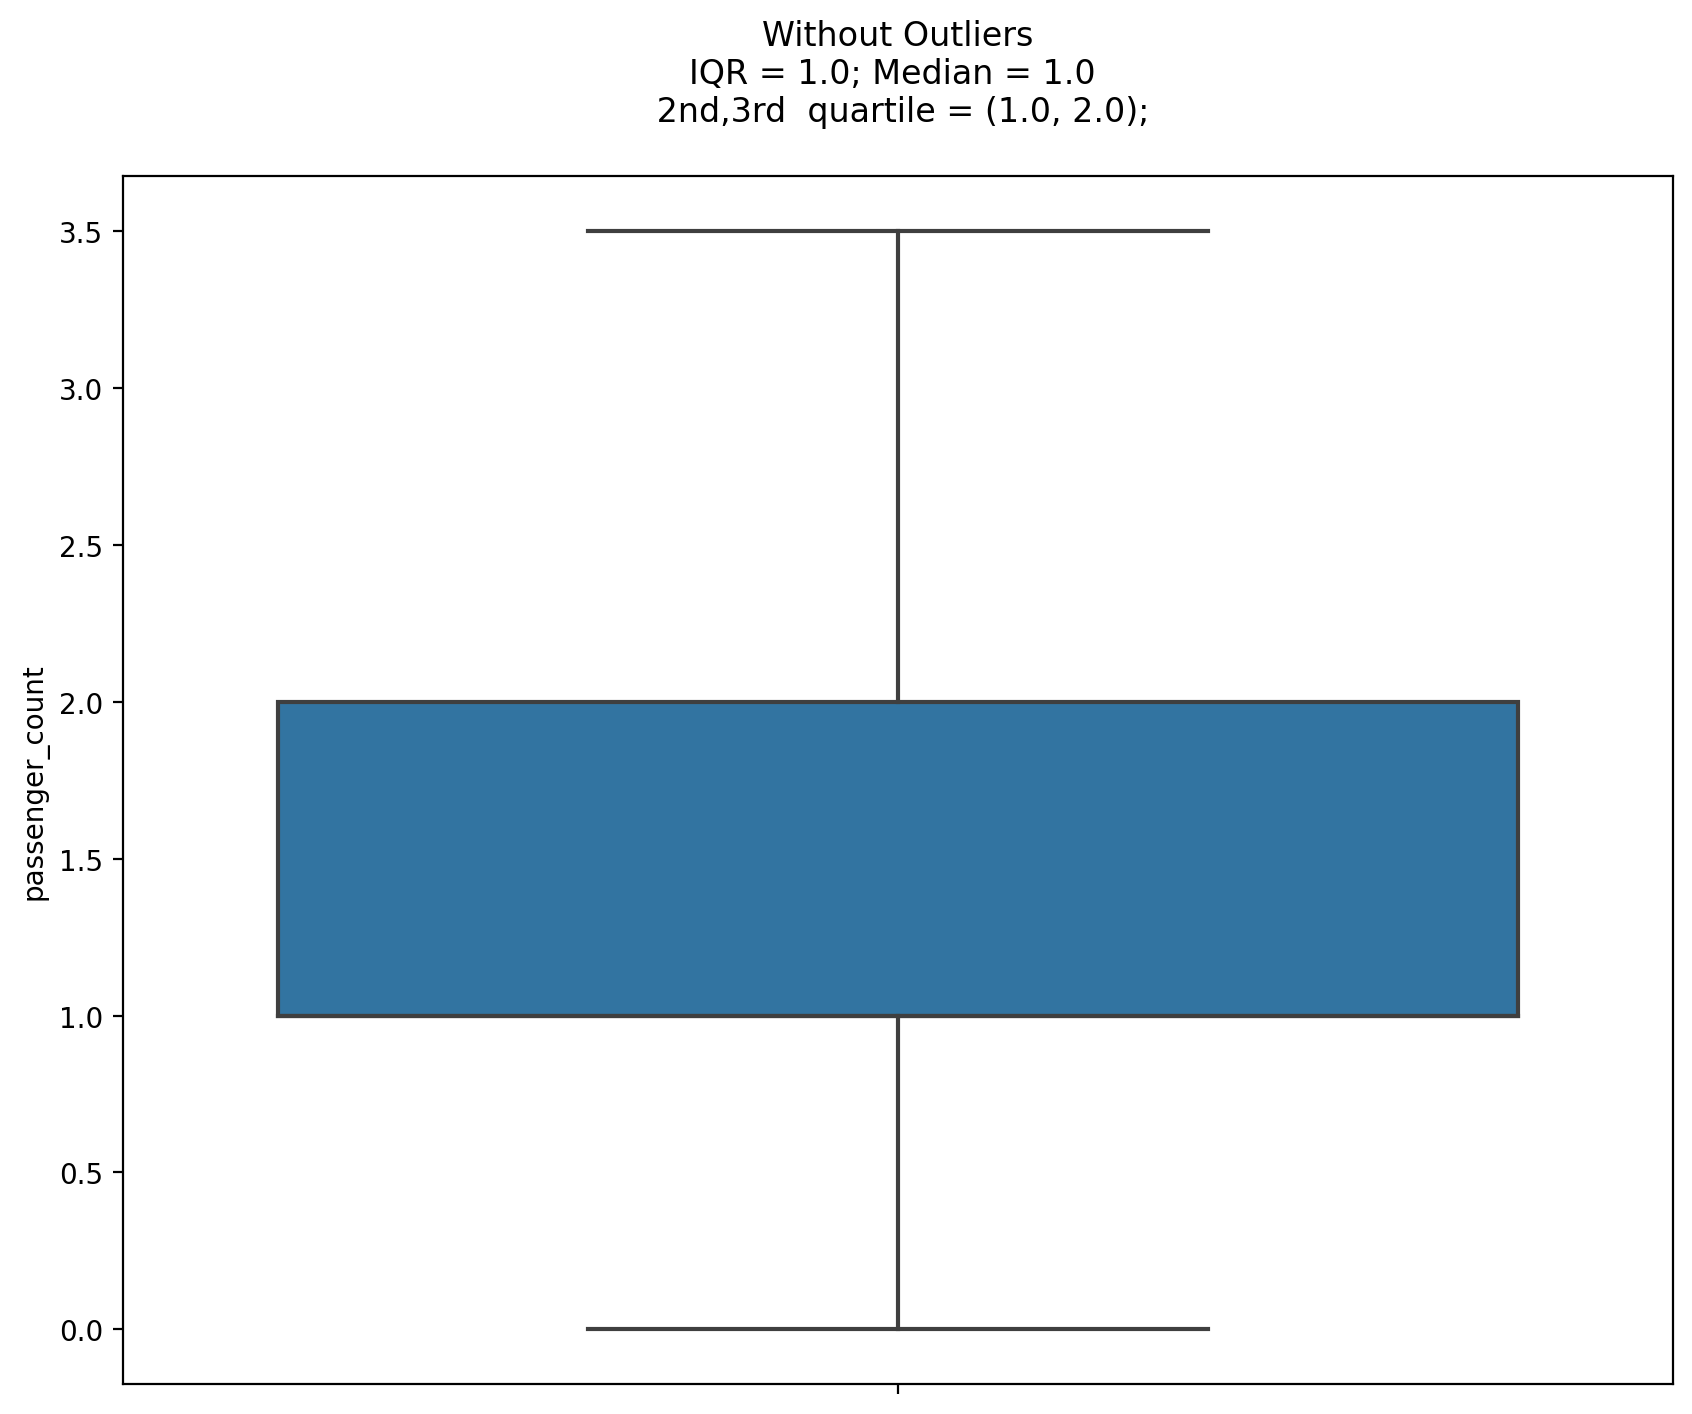

In [60]:
UVA_outlier(data, ['passenger_count'], include_outlier=False)

In [61]:
#revert back to categorical
data['passenger_count'] = data['passenger_count'].astype('category')

### pickup_dropoff_location

True
True
True
True


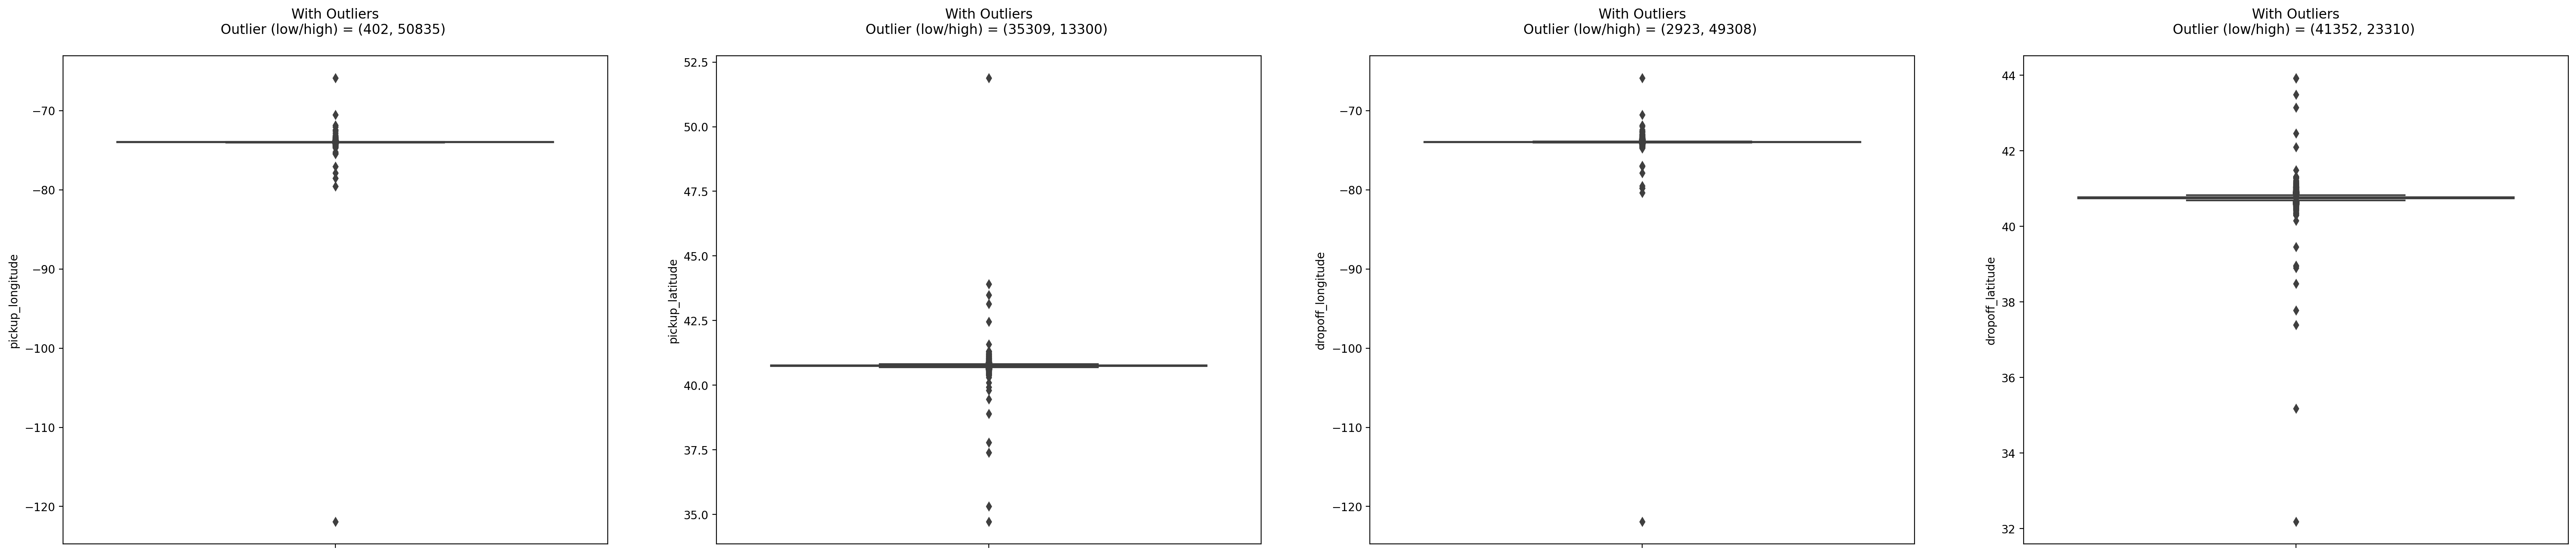

In [62]:
UVA_outlier(data, pickup_dropoff_location,)

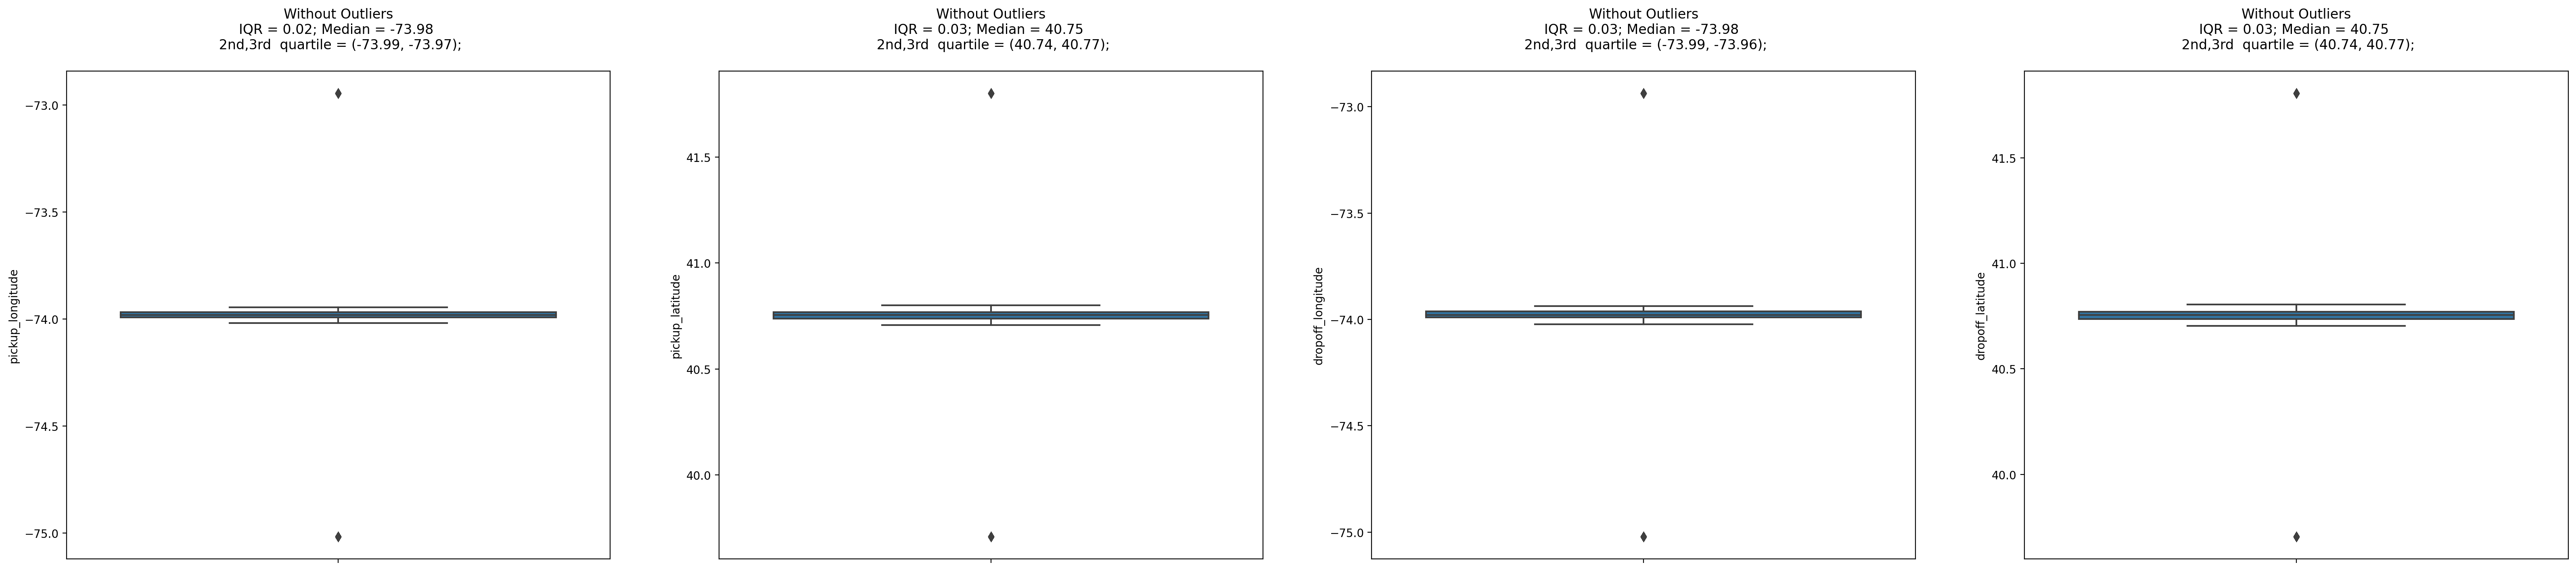

In [63]:
UVA_outlier(data, pickup_dropoff_location, include_outlier=False)

 ### trip_details

True
True
True
True


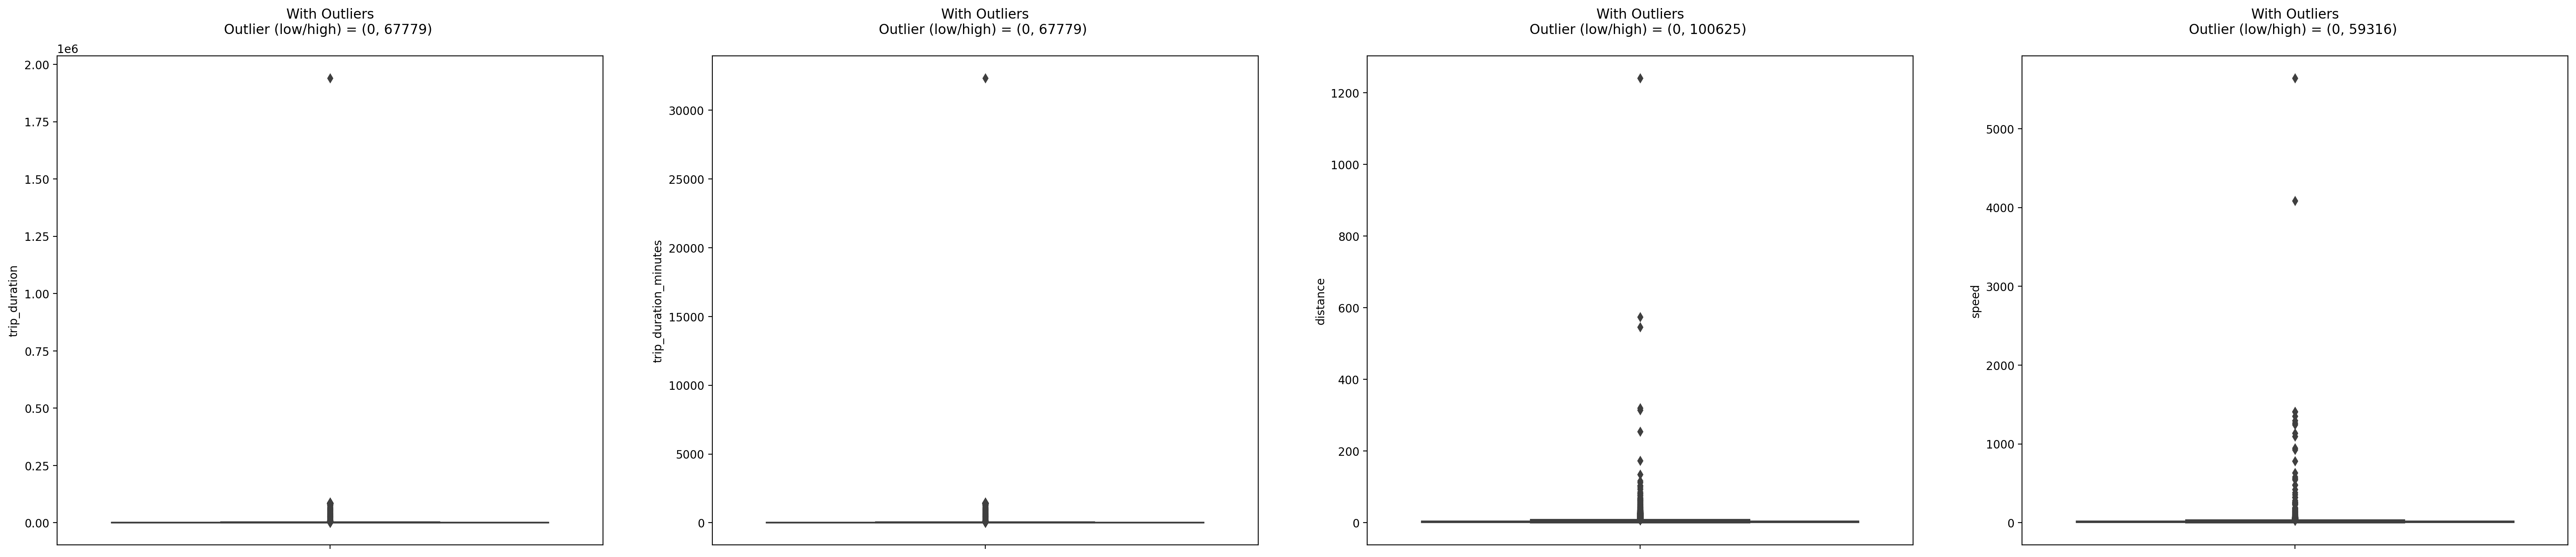

In [64]:
UVA_outlier(data, trip_details,)

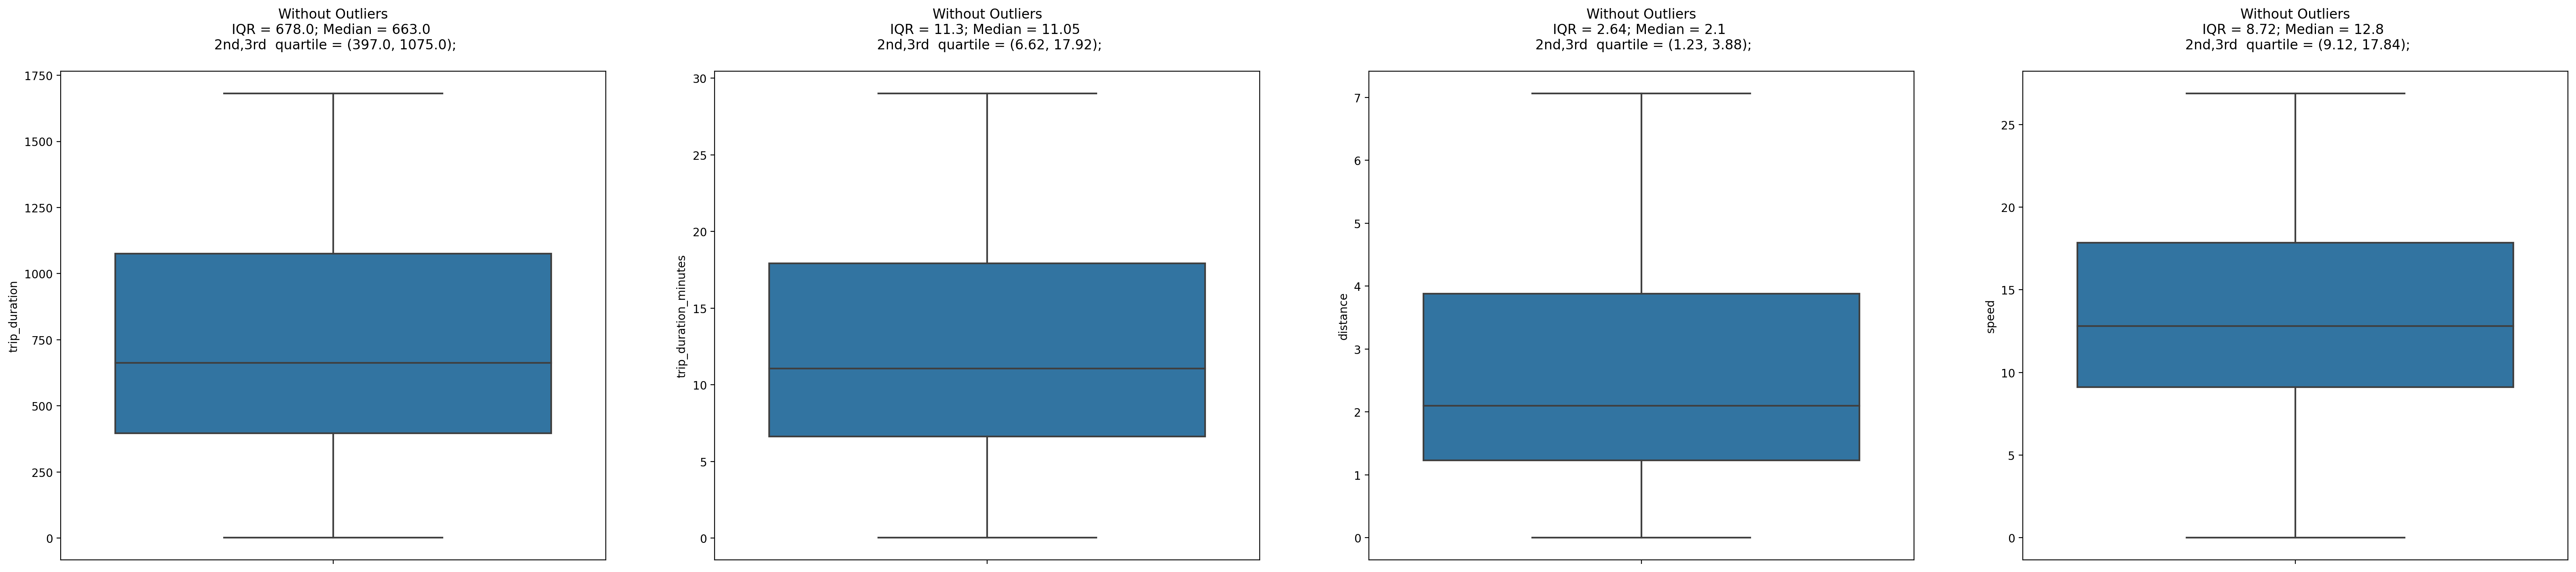

In [65]:
UVA_outlier(data, trip_details, include_outlier=False) 

### pickup_dropoff_time

True
True
True
True
True
True
True
True
True
True


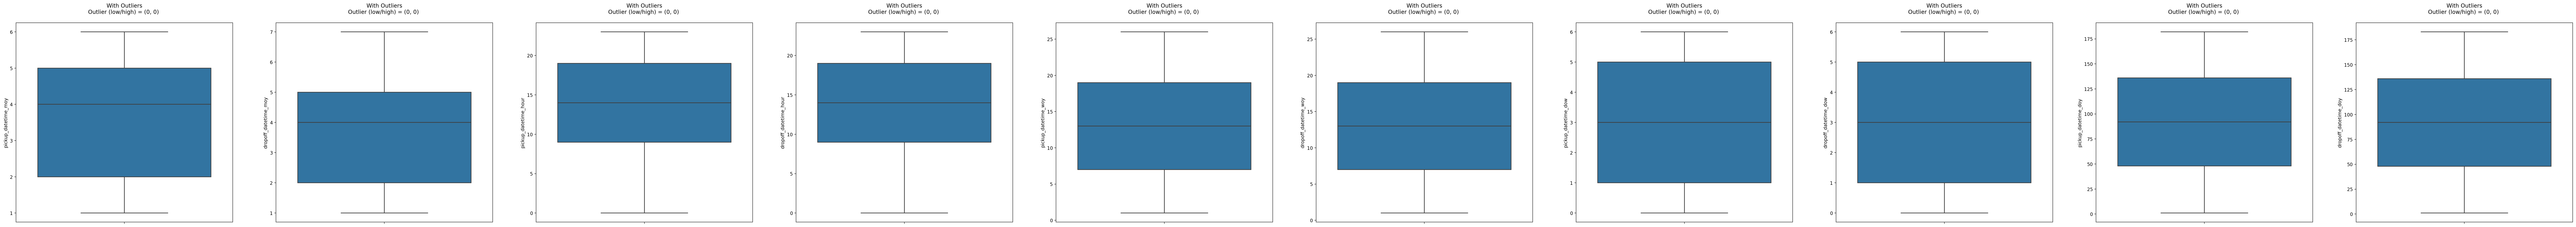

In [66]:
UVA_outlier(data, pickup_dropoff_time,)

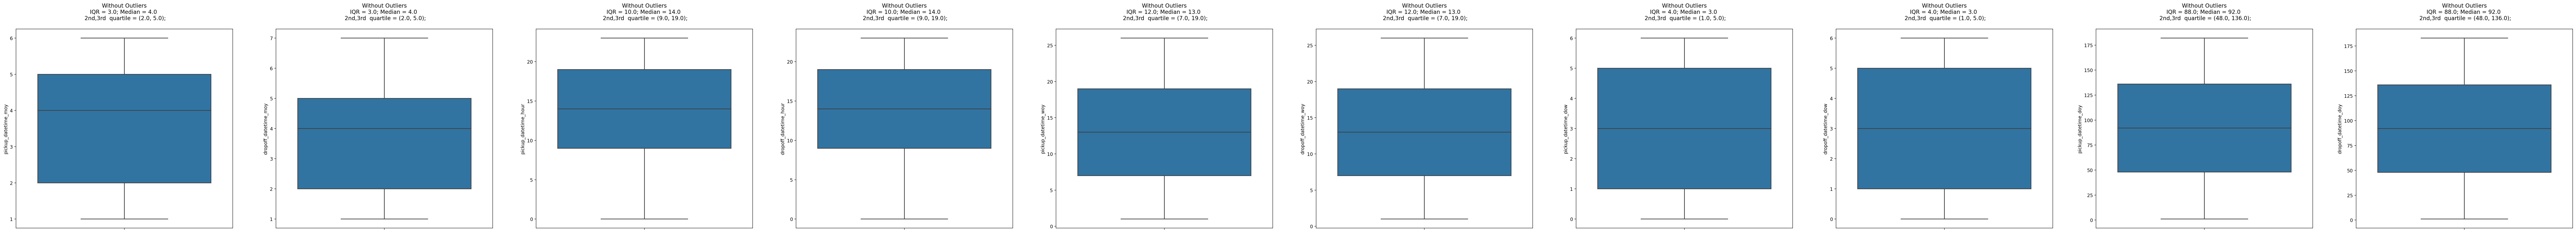

In [67]:
UVA_outlier(data, pickup_dropoff_time, include_outlier=False) 

## Bivariate Analysis : Numerical-Numerical

In [220]:
# isolating numerical datatypes
numerical = REKT_df.select_dtypes(include=['int64','float64','Int64'])[:]
numerical.dtypes

funds_lost_USD           float64
funds_returned_USD       float64
month_of_attack          float64
day_of_attack            float64
day_of_year_of_attack    float64
dtype: object

In [221]:
# calculating correlation
correlation = numerical.dropna().corr()
correlation

,funds_lost_USD,funds_returned_USD,month_of_attack,day_of_attack,day_of_year_of_attack
funds_lost_USD,1.000000,0.443819,-0.250812,-0.235984,-0.243490
funds_returned_USD,0.443819,1.000000,-0.118726,-0.077558,-0.113924
month_of_attack,-0.250812,-0.118726,1.000000,0.121911,0.995704
day_of_attack,-0.235984,-0.077558,0.121911,1.000000,0.105933
day_of_year_of_attack,-0.243490,-0.113924,0.995704,0.105933,1.000000


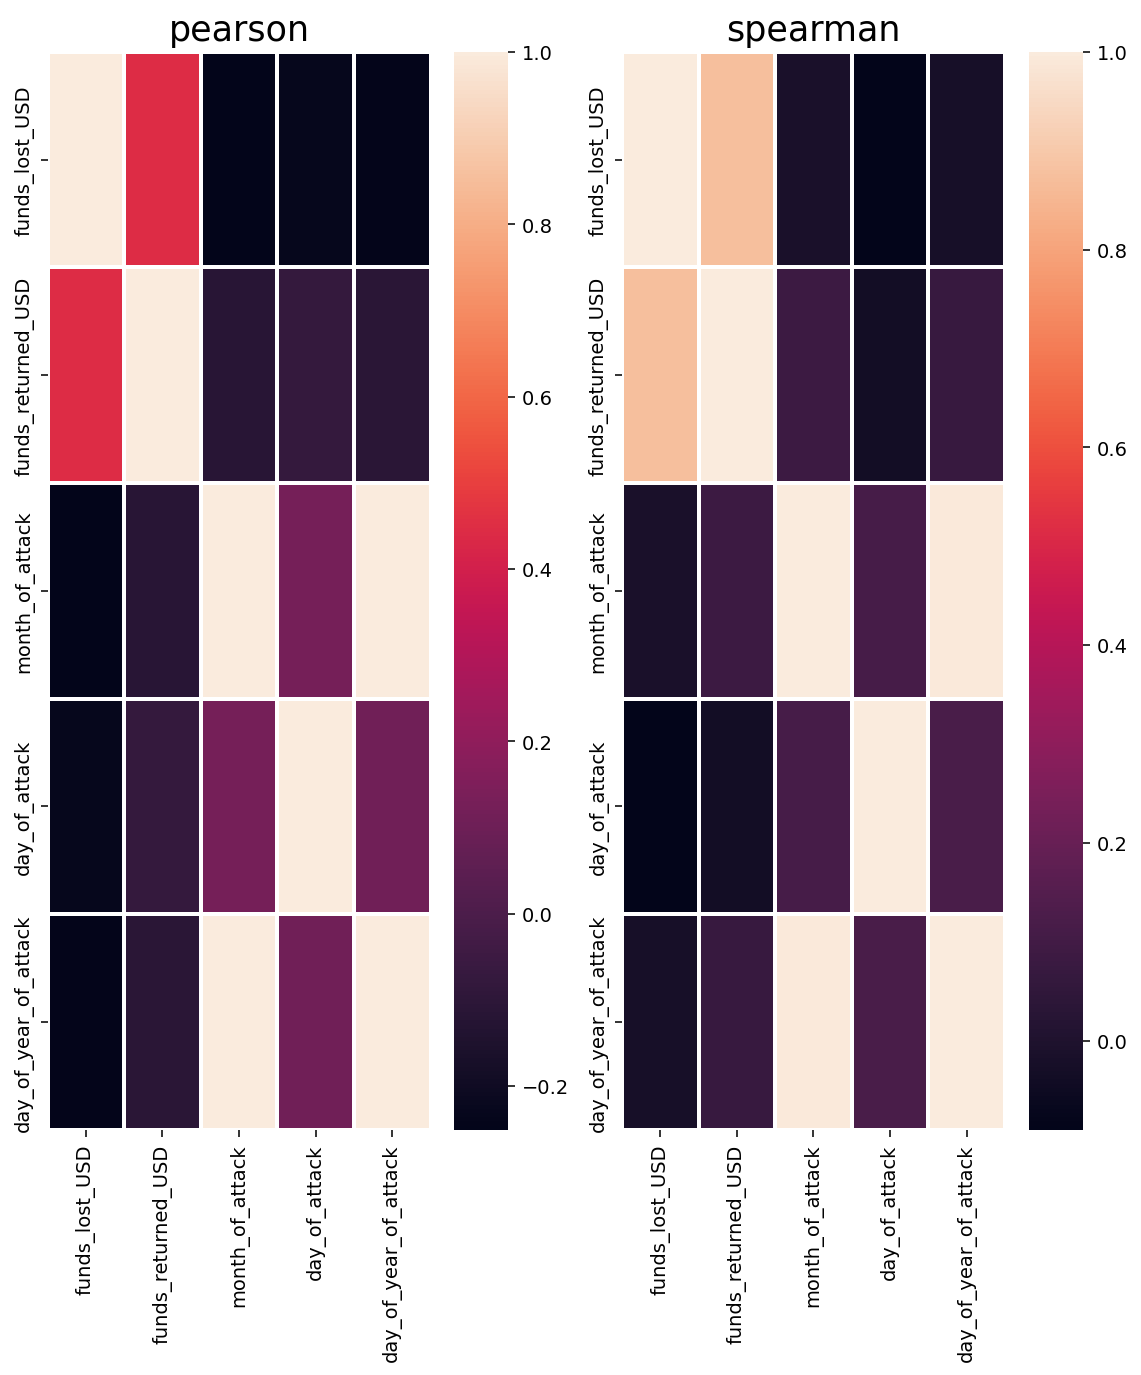

In [226]:
# plotting heatmap using Pearson Coeff, Kendall's Tau, and Spearman Coeff for all numerical variables
plt.figure(figsize=(15,10), dpi=140)
for j,i in enumerate(['pearson','spearman']):
  plt.subplot(1,3,j+1)
  correlation = numerical.dropna().corr(method=i)
  sns.heatmap(correlation, linewidth = 2)
  plt.title(i, fontsize=18)

* The Spearman correlation seems to have higher correlation values in same areas of the heatmap where they are less in the Pearson and Kendall correlations. 
*  Too many variables with insignificant correlation.
*  Major correlation lies between distance and trip duration variables, expectedly. **Hence, with these results, it would be more interesting to analyze correlations of numerical with categorical data.**

### Scatterplot


In [71]:
# Grouping variables
funds = ['funds_lost_USD','funds_returned_USD']
attack_dates = ['day_of_attack','month_of_attack', 'day_of_year_of_attack']

<Figure size 896x672 with 0 Axes>

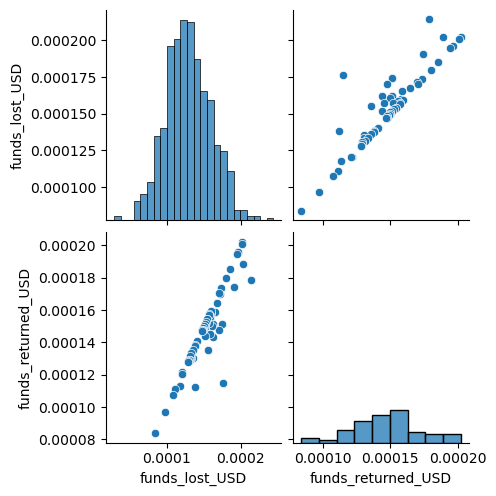

In [231]:
# scatter plot for funds variables
plt.figure(dpi=140)
sns.pairplot(numerical[funds])

**The scatter plot is is not meaningful due to the presence of outliers**

In [228]:
#taking log of every value and dividing by 100,000 to negate outliers
var = []
var.extend(funds)
for column in var:
  mini=1
  if numerical[column].min()<0:
    mini =  abs(numerical[column].min()) + 1
  
  numerical[column] = [i+mini for i in numerical[column]]
  numerical[column] = numerical[column].map(lambda x : np.log(x)/100000)

In [ ]:
# scatter plot for funds variables
plt.figure(dpi=140)
sns.pairplot(numerical[funds])

<Figure size 896x672 with 0 Axes>

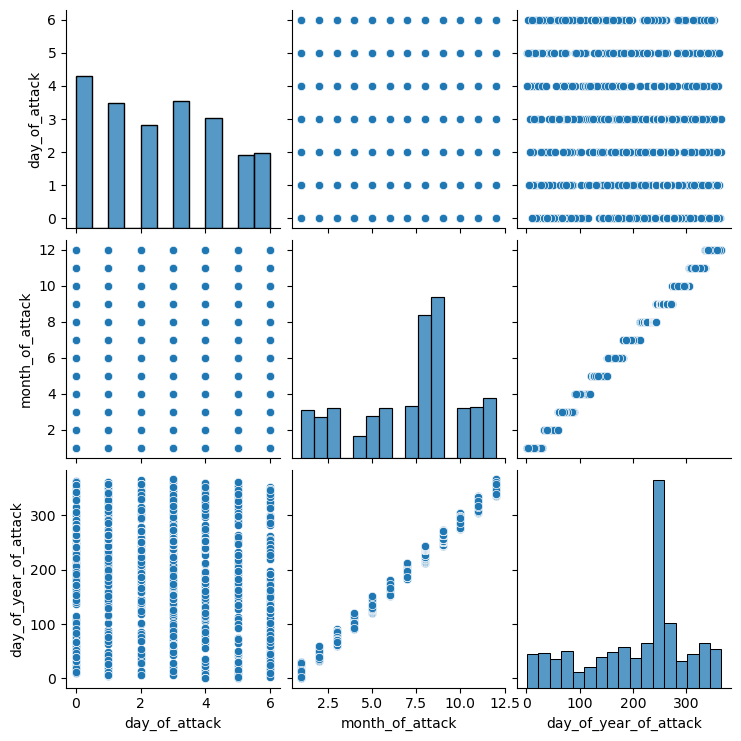

In [229]:
# scatter plot for pickup_dropoff_location variables
plt.figure(dpi=140)
sns.pairplot(numerical[attack_dates])

**Inferences**
1.    After negating a lot of outliers, a higher positive correlation between pickup_latitude and dropoff_latitude is observed.
2.    A correlation was still not observed between pickup_longitude and dropoff_longitude.

**Inferences**
1.    This validates the high correlation between distance and trip duration variables. We also observe positive correlations between speed and other variables of the trip_details group.
2.    This high correlation can be used for feature engineering during later stages.

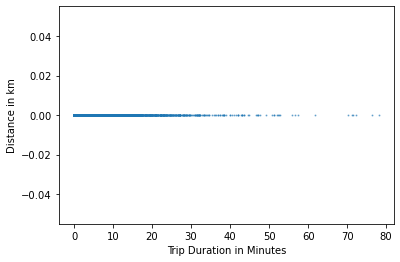

In [76]:
#if we remember from Univariate Analysis, we found that there were approx. 3000 observations with distance=0. We shall use a scatter plot to analyze the relation between this distance value and trip_duration_minutes
filtered_dist = data.loc[(data.distance == 0) & (data.trip_duration_minutes < 120), ['distance','trip_duration_minutes']]
plt.scatter(filtered_dist.trip_duration_minutes, filtered_dist.distance , s=1, alpha=0.5)
plt.ylabel('Distance in km')
plt.xlabel('Trip Duration in Minutes')
plt.show()

In [77]:
data.distance.mean()

3.441143400649962

**From the scatterplot above, it would be better to replace these distance values with their mean value rather than deleting them. We shall pursue this in the data preprocessing section.**

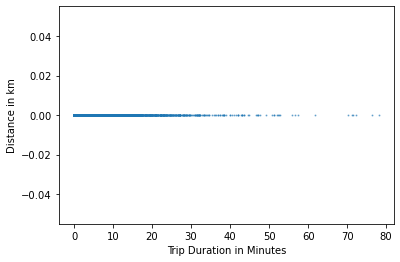

In [78]:
#if we also remember from Univariate Analysis, we found that there were approx. 3000 observations with distance=0. We shall use a scatter plot to analyze the relation between this distance value and trip_duration_minutes
filtered_dist = data.loc[(data.distance == 0) & (data.trip_duration_minutes < 120), ['distance','trip_duration_minutes']]
plt.scatter(filtered_dist.trip_duration_minutes, filtered_dist.distance , s=1, alpha=0.5)
plt.ylabel('Distance in km')
plt.xlabel('Trip Duration in Minutes')
plt.show()

## Bivariate Analysis: Continuous-Categorical variables


**List of Hypotheses and investigation to perform under this combination.**

1.  Are taxis with higher passenger_counts, greater than 2 but less than 7 passengers, more likely to have higher trip durations?
2.  Is Vendor 1 less likely to deal with higher trip durations than Vendor 2 does?
3.  Do taxis that store and forward trips, because the vehicle did not have a connection to the server, experience higher trip duration?
4. Do taxis with higher passenger_counts, greater than 2 but less than 7 passengers, travel greater distances?
5. Does Vendor 2 deal with higher distances to travel than Vendor 1 does?
6. Do taxis that store and forward trips, because the vehicle did not have a connection to the server, travel greater distances?

In [234]:
def TwoSampZ(X1, X2, sigma1, sigma2, N1, N2):
  '''
  takes mean, standard deviation, and number of observations and returns p-value calculated for 2-sampled Z-Test
  '''
  from numpy import sqrt, abs, round
  from scipy.stats import norm
  ovr_sigma = sqrt(sigma1**2/N1 + sigma2**2/N2)
  z = (X1 - X2)/ovr_sigma
  pval = 2*(1 - norm.cdf(abs(z)))
  return pval

In [235]:
def TwoSampT(X1, X2, sd1, sd2, n1, n2):
  '''
  takes mean, standard deviation, and number of observations and returns p-value calculated for 2-sample T-Test
  '''
  from numpy import sqrt, abs, round
  from scipy.stats import t as t_dist
  ovr_sd = sqrt(sd1**2/n1 + sd2**2/n2)
  t = (X1 - X2)/ovr_sd
  df = n1+n2-2
  pval = 2*(1 - t_dist.cdf(abs(t),df))
  return pval

In [236]:
def Bivariate_cont_cat_hypoth1(data, cont, cat):
  #creating 2 samples, passenger_counts <= 2 (x1) and 2 < passenger_counts < 7 (x2)
  x1 = data[cont][data[cat].isin([0,1,2])][:]
  x2 = data[cont][data[cat].isin([3,4,5,6])][:]
                  
  #calculating descriptives
  n1, n2 = x1.shape[0], x2.shape[0]
  m1, m2 = x1.mean(), x2.mean()
  std1, std2 = x1.std(), x2.std()
  
  #calculating p-values
  t_p_val = TwoSampT(m1, m2, std1, std2, n1, n2)
  z_p_val = TwoSampZ(m1, m2, std1, std2, n1, n2)

  #table
  table = pd.pivot_table(data=data, values=cont, columns=cat, aggfunc = np.mean)

  #plotting
  plt.figure(figsize = (15,6), dpi=140)
  
  #barplot
  plt.subplot(1,2,1)
  sns.barplot(['passenger_counts <= 2','2 < passenger_counts < 7'], [m1, m2])
  plt.ylabel('mean {}'.format(cont))
  plt.xlabel(cat)
  plt.title('t-test p-value = {} \n z-test p-value = {}\n {}'.format(t_p_val,
                                                                z_p_val,
                                                                table))

  # boxplot
  plt.subplot(1,2,2)
  sns.boxplot(x=cat, y=cont, data=data)
  plt.title('categorical boxplot')
  

### **1.  Are taxis with higher passenger_counts, greater than 2 but less than 7 passengers, more likely to have higher trip durations?**

In [237]:
Bivariate_cont_cat_hypoth1(REKT_df, 'funds_lost_USD', 'scam_type') 

ZeroDivisionError: float division by zero

**Inferences**

1.    Taxis carrying more than 2 but less than 7 passengers (to remove outlier passenger of 7 and 9) had higher trip durations, as seen in the barplot, and p-value results are significantly different too, as p-value < 0.05. Results of the pivot table for mean mean_trip_duration for taxis carrying more than 2 but less than 7 passengers are also higher.
2.    Although the boxplot does not represent the above relation very clearly, due to the presence of high outliers, if we do get rid of those outliers and zoom in on the boxplots, we would be able to see the relation clearly.

**Result**

We can confidently reject the null hypothesis that taxis with higher passenger_counts, greater than 2 passengers but less than 7 passengers, are less likely to have higher trip durations.

### **2.  Is Vendor 1 less likely to deal with higher trip durations than Vendor 2 does?**

In [84]:
def Bivariate_cont_cat(data, cont, cat, category):
  #creating 2 samples
  x1 = data[cont][data[cat]==category][:]
  x2 = data[cont][~(data[cat]==category)][:]
  
  #calculating descriptives
  n1, n2 = x1.shape[0], x2.shape[0]
  m1, m2 = x1.mean(), x2.mean()
  std1, std2 = x1.std(), x2.mean()
  
  #calculating p-values
  t_p_val = TwoSampT(m1, m2, std1, std2, n1, n2)
  z_p_val = TwoSampZ(m1, m2, std1, std2, n1, n2)

  #table
  table = pd.pivot_table(data=data, values=cont, columns=cat, aggfunc = np.mean)

  #plotting
  plt.figure(figsize = (15,6), dpi=140)
  
  #barplot
  plt.subplot(1,2,1)
  sns.barplot([str(category),'2'.format(category)], [m1, m2])
  plt.ylabel('mean {}'.format(cont))
  plt.xlabel(cat)
  plt.title('t-test p-value = {} \n z-test p-value = {}\n {}'.format(t_p_val,
                                                                z_p_val,
                                                                table))

  # boxplot
  plt.subplot(1,2,2)
  sns.boxplot(x=cat, y=cont, data=data)
  plt.title('categorical boxplot')
  

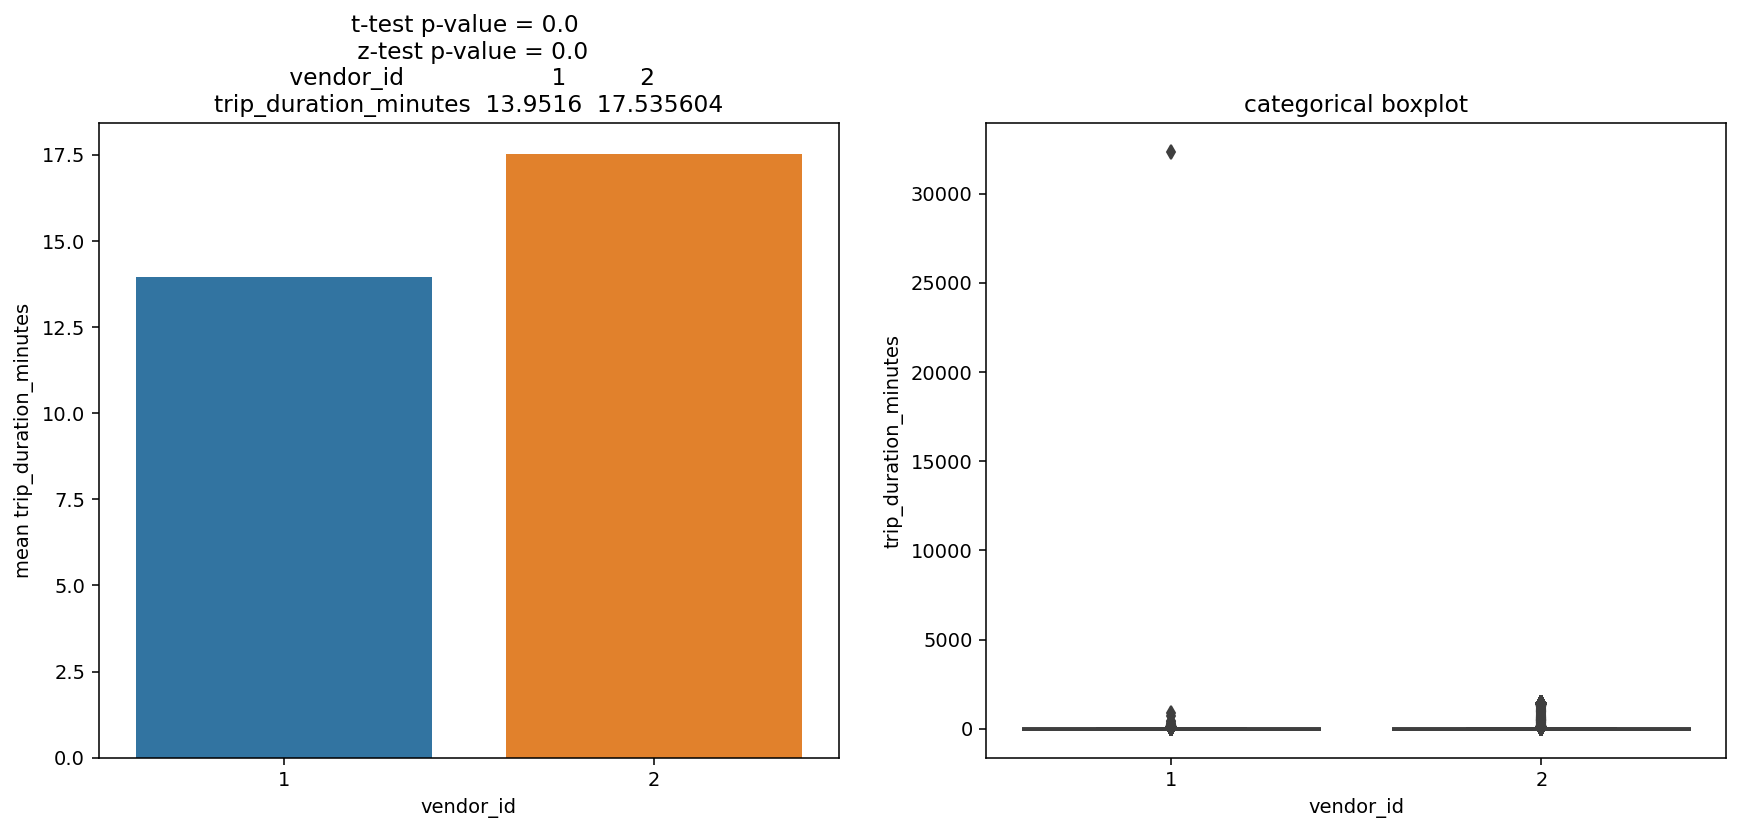

In [85]:
Bivariate_cont_cat(data, 'trip_duration_minutes', 'vendor_id', 1)

**Inferences**

1.    Taxis carrying more than 2 but less than 7 passengers (to remove outlier passenger of 7 and 9) had higher trip durations, as seen in the barplot, and p-value results are significantly different too, as p-value < 0.05. Results of the pivot table for mean mean_trip_duration for taxis carrying more than 2 but less than 7 passengers are also higher.
2.    Boxplot shows a similar distribution, although with high outliers for vendor 1, and this further reinforces the above relation.

**Result**

We can confidently reject the null hypothesis that Vendor 1 is more likely to deal with higher trip durations than Vendor 2 does.

### **3.  Do taxis that store and forward trips, because the vehicle did not have a connection to the server, experience higher trip duration?**

In [86]:
def Bivariate_cont_cat(data, cont, cat, category):
  #creating 2 samples
  x1 = data[cont][data[cat]==category][:]
  x2 = data[cont][~(data[cat]==category)][:]
  
  #calculating descriptives
  n1, n2 = x1.shape[0], x2.shape[0]
  m1, m2 = x1.mean(), x2.mean()
  std1, std2 = x1.std(), x2.mean()
  
  #calculating p-values
  t_p_val = TwoSampT(m1, m2, std1, std2, n1, n2)
  z_p_val = TwoSampZ(m1, m2, std1, std2, n1, n2)

  #table
  table = pd.pivot_table(data=data, values=cont, columns=cat, aggfunc = np.mean)

  #plotting
  plt.figure(figsize = (15,6), dpi=140)
  
  #barplot
  plt.subplot(1,2,1)
  sns.barplot([str(category),'N'.format(category)], [m1, m2])
  plt.ylabel('mean {}'.format(cont))
  plt.xlabel(cat)
  plt.title('t-test p-value = {} \n z-test p-value = {}\n {}'.format(t_p_val,
                                                                z_p_val,
                                                                table))

  # boxplot
  plt.subplot(1,2,2)
  sns.boxplot(x=cat, y=cont, data=data)
  plt.title('categorical boxplot')

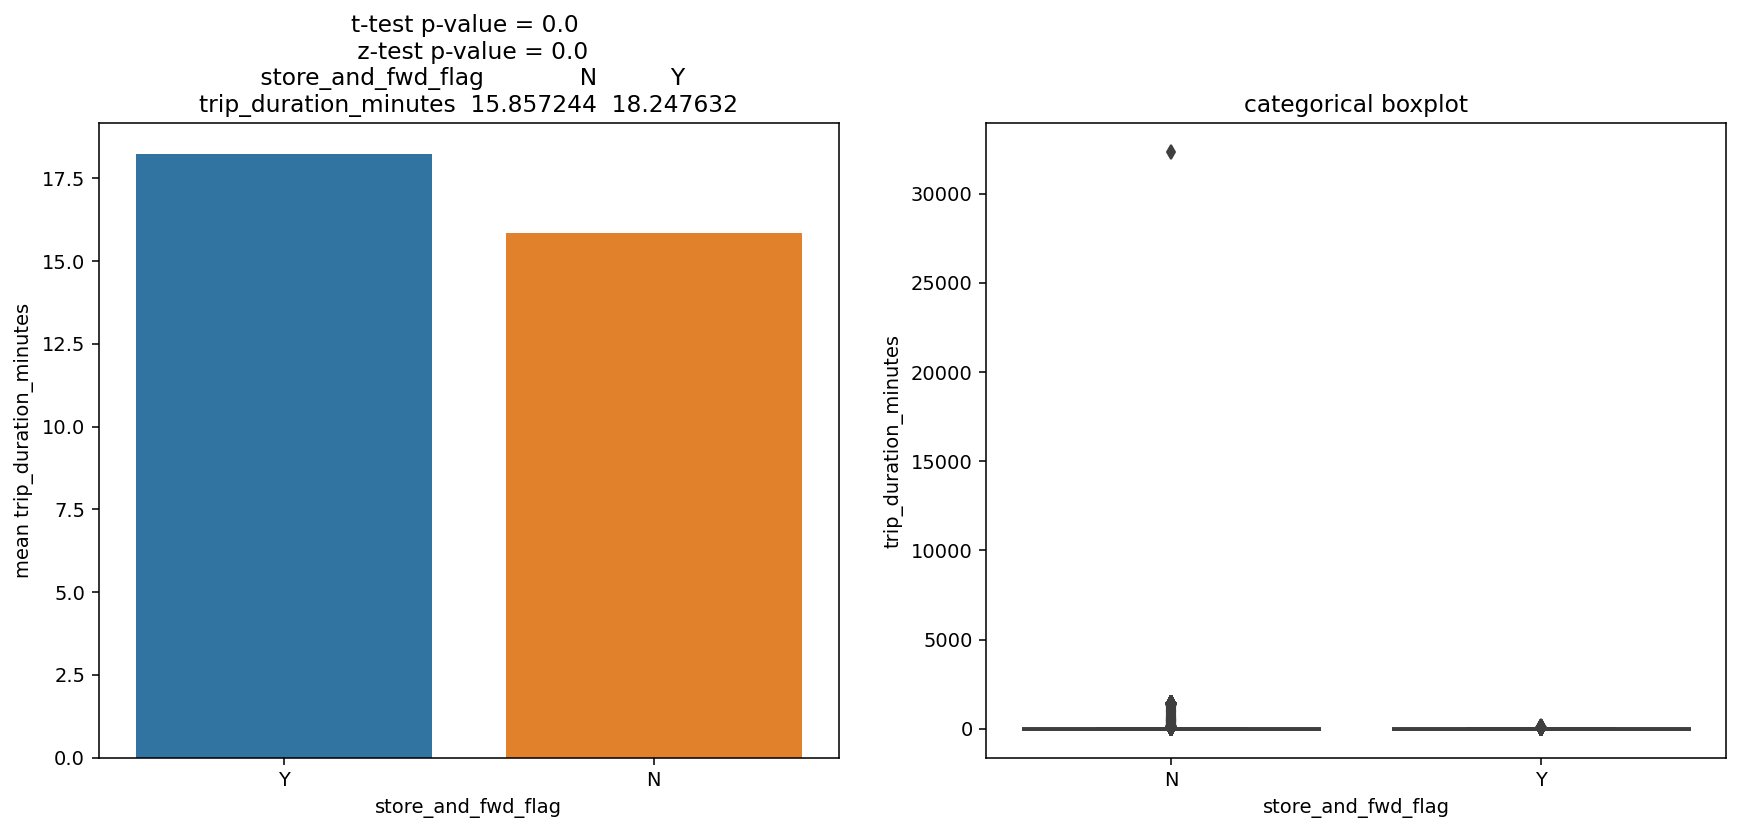

In [87]:
Bivariate_cont_cat(data, 'trip_duration_minutes', 'store_and_fwd_flag', 'Y')

**Inferences**

1.    Taxis that store and forward trips, because the vehicle did not have a connection to the server, did experience higher trip duration, as seen in the barplot, and p-value results are significantly different too, as p-value < 0.05. Results of the pivot table for mean mean_trip_duration for taxis carrying more than 2 but less than 7 passengers are also higher.
2.    Although the boxplot does not represent the above relation very clearly, due to the presence of high outliers in the taxis that did NOT store and forward trips, if we do get rid of those outliers and zoom in on the boxplots, we would be able to see the relation clearly. 

**Result**

We can confidently reject the null hypothesis that taxis that store and forward trips, because the vehicle did not have a connection to the server, experience lower trip duration.

### **4.  Do taxis with higher passenger_counts, greater than 2 but less than 7 passengers, travel greater distances?**

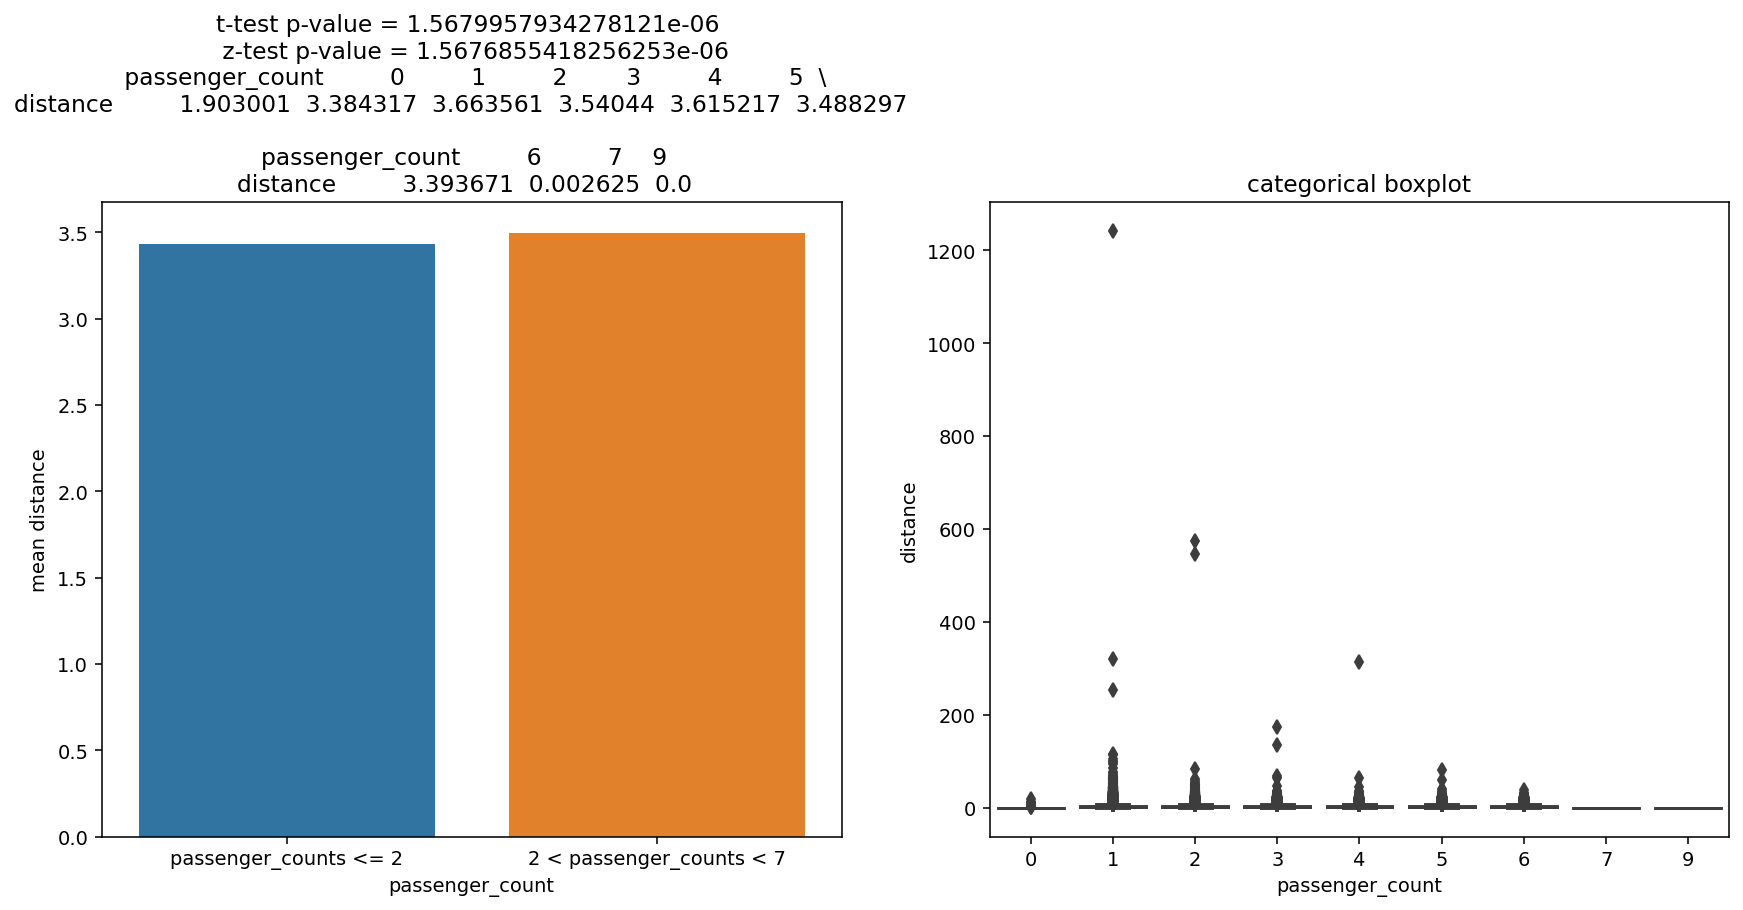

In [88]:
Bivariate_cont_cat_hypoth1(data, 'distance', 'passenger_count') 

**Inferences**

1.    Although taxis with higher passenger_counts, greater than 2 but less than 7 passengers, do travel greater distances as seen in the barplot, the p-value results are insignificant, as p-value > 0.05. 
2.    Although the boxplot represents that there are significant outliers for passenger_count 1 and 2, the distances travelled by those taxis are still a little less than their counterpart. 

**Result**

We cannot reject the null hypothesis that taxis with higher passenger_counts, greater than 2 but less than 7 passengers, travel less distances.

### **5.  Does Vendor 2 deal with higher distances to travel than Vendor 1 does?**

In [89]:
def Bivariate_cont_cat(data, cont, cat, category):
  #creating 2 samples
  x1 = data[cont][data[cat]==category][:]
  x2 = data[cont][~(data[cat]==category)][:]
  
  #calculating descriptives
  n1, n2 = x1.shape[0], x2.shape[0]
  m1, m2 = x1.mean(), x2.mean()
  std1, std2 = x1.std(), x2.mean()
  
  #calculating p-values
  t_p_val = TwoSampT(m1, m2, std1, std2, n1, n2)
  z_p_val = TwoSampZ(m1, m2, std1, std2, n1, n2)

  #table
  table = pd.pivot_table(data=data, values=cont, columns=cat, aggfunc = np.mean)

  #plotting
  plt.figure(figsize = (15,6), dpi=140)
  
  #barplot
  plt.subplot(1,2,1)
  sns.barplot([str(category),'2'.format(category)], [m1, m2])
  plt.ylabel('mean {}'.format(cont))
  plt.xlabel(cat)
  plt.title('t-test p-value = {} \n z-test p-value = {}\n {}'.format(t_p_val,
                                                                z_p_val,
                                                                table))

  # boxplot
  plt.subplot(1,2,2)
  sns.boxplot(x=cat, y=cont, data=data)
  plt.title('categorical boxplot')

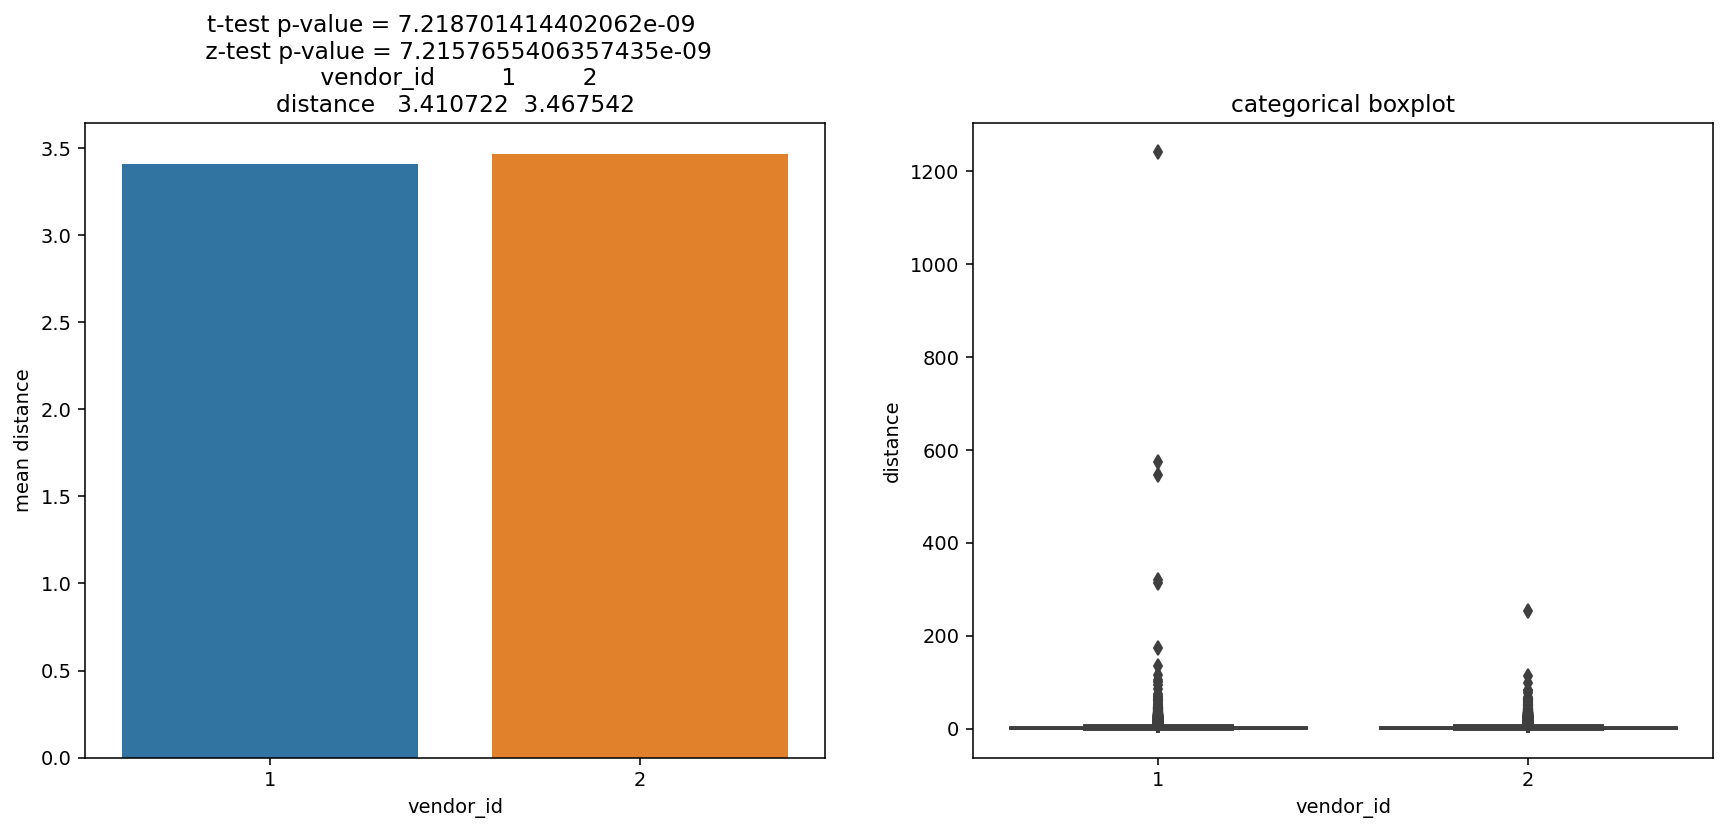

In [90]:
Bivariate_cont_cat(data, 'distance', 'vendor_id', 1)

**Inferences**

1.    Although Vendor 2 deals with higher distances to travel than Vendor 1 does as seen in the barplot and mean distance values, the p-value results are insignificant, as p-value > 0.05. 
2.    The boxplot represents that there are significant outliers for vendor 1, but lesser for vendor 2

**Result**

We cannot reject the null hypothesis that Vendor 2 deals with lower distances, on average, to travel than Vendor 1 does.

### **6.  Do taxis that store and forward trips, because the vehicle did not have a connection to the server, travel greater distances?**

In [91]:
def Bivariate_cont_cat(data, cont, cat, category):
  #creating 2 samples
  x1 = data[cont][data[cat]==category][:]
  x2 = data[cont][~(data[cat]==category)][:]
  
  #calculating descriptives
  n1, n2 = x1.shape[0], x2.shape[0]
  m1, m2 = x1.mean(), x2.mean()
  std1, std2 = x1.std(), x2.mean()
  
  #calculating p-values
  t_p_val = TwoSampT(m1, m2, std1, std2, n1, n2)
  z_p_val = TwoSampZ(m1, m2, std1, std2, n1, n2)

  #table
  table = pd.pivot_table(data=data, values=cont, columns=cat, aggfunc = np.mean)

  #plotting
  plt.figure(figsize = (15,6), dpi=140)
  
  #barplot
  plt.subplot(1,2,1)
  sns.barplot([str(category),'N'.format(category)], [m1, m2])
  plt.ylabel('mean {}'.format(cont))
  plt.xlabel(cat)
  plt.title('t-test p-value = {} \n z-test p-value = {}\n {}'.format(t_p_val,
                                                                z_p_val,
                                                                table))

  # boxplot
  plt.subplot(1,2,2)
  sns.boxplot(x=cat, y=cont, data=data)
  plt.title('categorical boxplot')

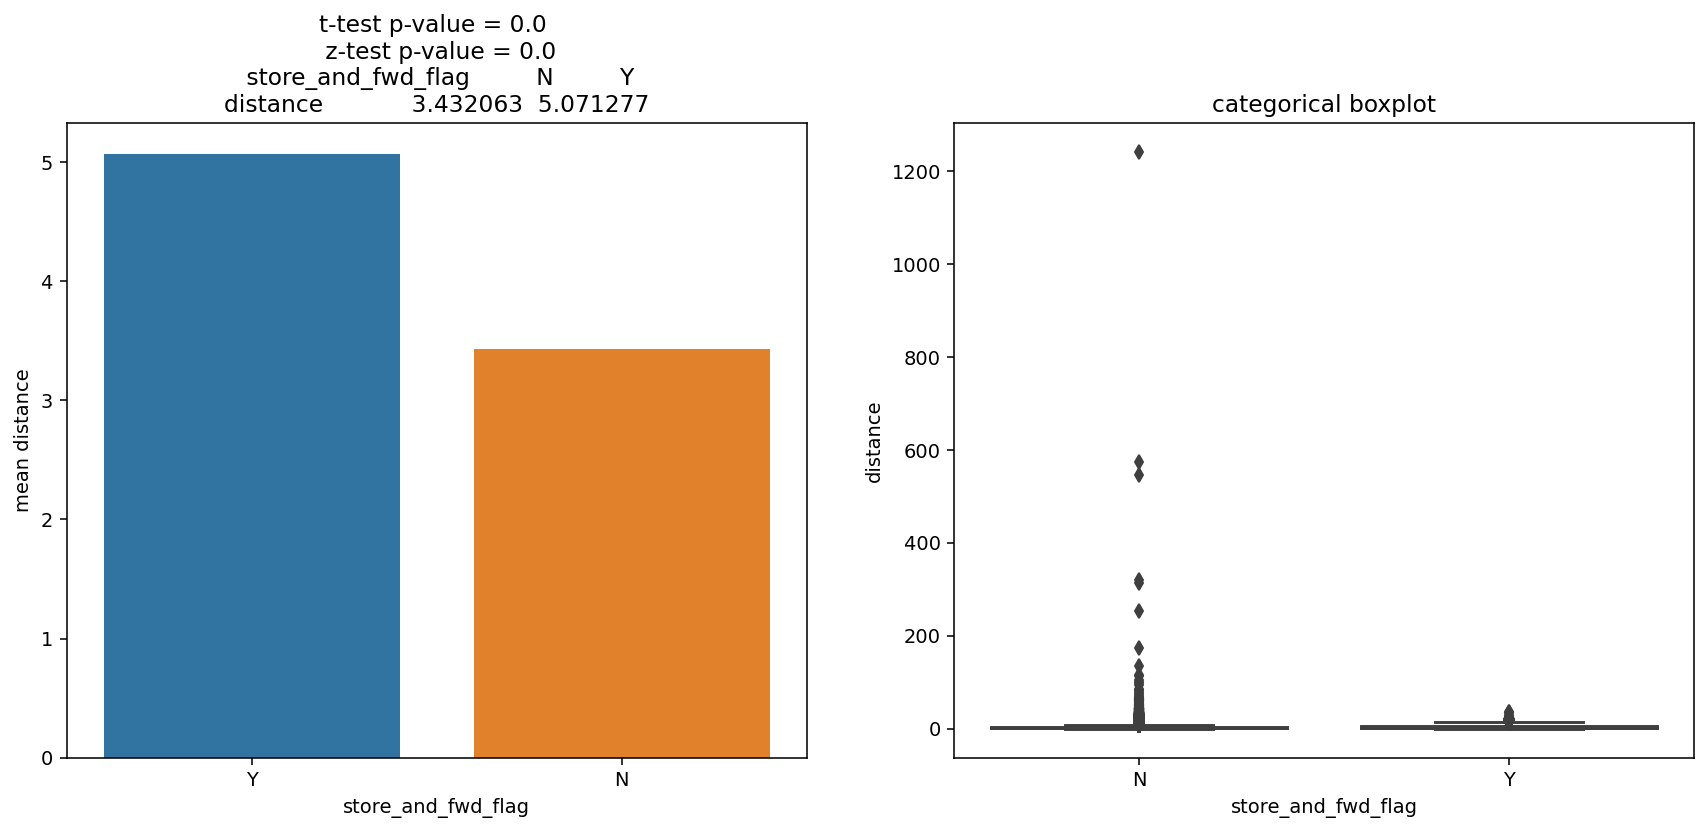

In [92]:
Bivariate_cont_cat(data, 'distance', 'store_and_fwd_flag', 'Y')

**Inferences**

1.    Taxis that store and forward trips, because the vehicle did not have a connection to the server, did significantly travel higher distances, as seen in the barplot, because p-value < 0.05. Results of the pivot table for  mean distance of taxis that store and forward trips are also higher.
2.    Although the boxplot does not represent the above relation very clearly, due to the presence of high outliers in the taxis that did NOT store and forward trips, if we do get rid of those outliers and zoom in on the boxplots, we would be able to see the relation clearly. 

**Result**

We can confidently reject the null hypothesis that taxis that store and forward trips, because the vehicle did not have a connection to the server, did not travel greater distances.

## Bivariate : Categorical-Categorical

In [93]:
data.dtypes[data.dtypes == 'category']

id                    category
vendor_id             category
passenger_count       category
store_and_fwd_flag    category
dtype: object

#### List of Hypotheses to check under this combination
1.   Are taxis with higher passenger_counts, greater than 2 but less than 7 passengers, more likely to belong to Vendor 2?
2.   Are taxis with higher passenger_counts, greater than 2 but less than 7 passengers, more likely to store and forward trips, because the vehicle did not have a connection to the server?
3.   Does Vendor 2 deal with trips that are more likely to store and forward trips, because the vehicle did not have a connection to the server?

In [94]:
def BVA_categorical_plot(data, tar, cat):
  '''
  take data and two categorical variables,
  calculates the chi2 significance between the two variables 
  and prints the result with countplot & CrossTab
  '''
  #isolating the variables
  data = data[[cat,tar]][:]

  #forming a crosstab
  table = pd.crosstab(data[tar],data[cat],)
  f_obs = np.array([table.iloc[0][:].values,
                    table.iloc[1][:].values])

  #performing chi2 test
  from scipy.stats import chi2_contingency
  chi, p, dof, expected = chi2_contingency(f_obs)
  
  #checking whether results are significant
  if p<0.05:
    sig = True
  else:
    sig = False

  #plotting grouped plot
  sns.countplot(x=cat, hue=tar, data=data)
  plt.title("p-value = {}\n difference significant? = {}\n".format(round(p,8),sig))

  #plotting percent stacked bar plot
  #sns.catplot(ax, kind='stacked')
  ax1 = data.groupby(cat)[tar].value_counts(normalize=True).unstack()
  ax1.plot(kind='bar', stacked='True',title=str(ax1))
  int_level = data[cat].value_counts()

### 1.  Are taxis with higher passenger_count, greater than 2 but less than 7 passengers, more likely to belong to  Vendor 2?


In [95]:
# converting passenger_count to integer first, segregating customers into segments, removing passenger_count_group values of 'str'
data['passenger_count'] = data['passenger_count'].astype('int64')
vendor = data[['passenger_count','vendor_id']][:]
vendor['passenger_count_group'] = 'str'
vendor['passenger_count_group'][vendor['passenger_count']<=2] = 'low passenger count'
vendor['passenger_count_group'][(vendor['passenger_count']>2) & (vendor['passenger_count']<7)] = 'high passenger count'
vendor = vendor[vendor.passenger_count_group != 'str']


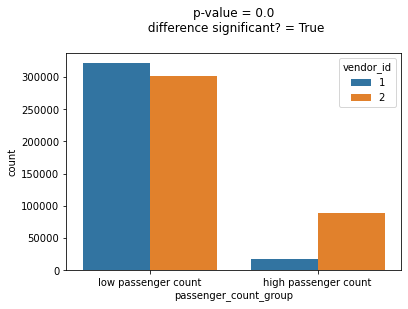

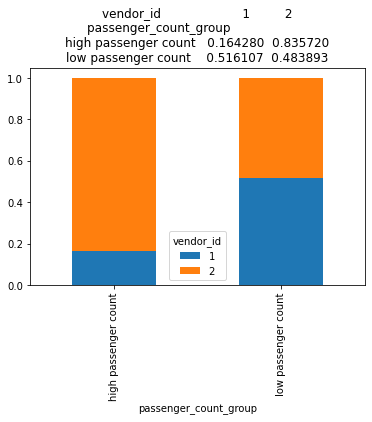

In [96]:
BVA_categorical_plot(vendor, 'vendor_id', 'passenger_count_group')

**Result**: Number of passengers in a taxi on a certain trip has a significant effect on which type of vendor they will ride with. Hence, we can reject the null hypothesis that taxis with higher passenger_count, greater than 2 but less than 7 passengers, are less likely to belong to Vendor 2.

### 2. Are taxis with higher passenger_counts, greater than 2 but less than 7 passengers, more likely to store and forward trips, because the vehicle did not have a connection to the server?

In [97]:
# converting passenger_count to integer first, segregating customers into segments, removing passenger_count_group values of 'str'
data['passenger_count'] = data['passenger_count'].astype('int64')
store_forward = data[['passenger_count','store_and_fwd_flag']][:]
store_forward['passenger_count_group'] = 'str'
store_forward['passenger_count_group'][store_forward['passenger_count']<=2] = 'low passenger count'
store_forward['passenger_count_group'][(store_forward['passenger_count']>2) & (store_forward['passenger_count']<7)] = 'high passenger count'
store_forward = store_forward[store_forward.passenger_count_group != 'str']


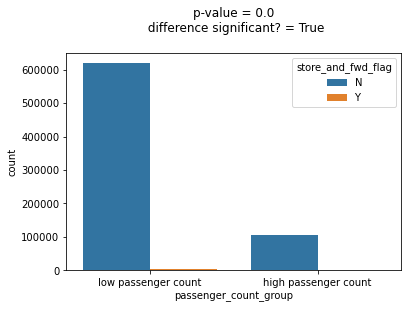

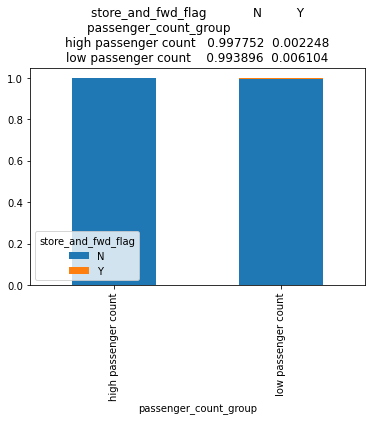

In [98]:
BVA_categorical_plot(store_forward, 'store_and_fwd_flag', 'passenger_count_group')

**Result**: Number of passengers in a taxi on a certain trip has a significant effect on whether the trip record was held in-vehicle memory before sending to the vendor. Hence, we cannot reject the null hypothesis that taxis with higher passenger_count, greater than 2 but less than 7 passengers, are less likely to store and forward trips, because the vehicle did not have a connection to the server

### 3. Does Vendor 2 deal with trips that are more likely to store and forward trips, because the vehicle did not have a connection to the server?

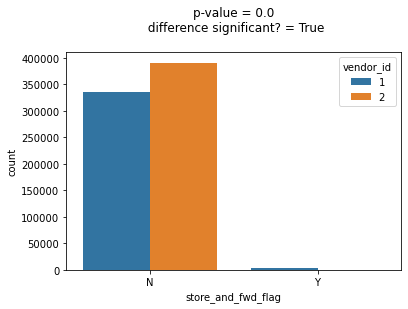

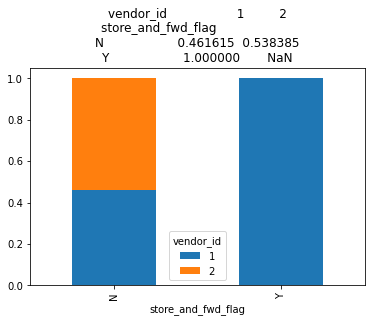

In [99]:
BVA_categorical_plot(data, 'vendor_id', 'store_and_fwd_flag')

# Multivariate Analysis

## Box Plot

We are using a grouped boxplot to comply with the objective of determining the trip_duration using various categorical features. We'll use vendor_id, passenger_count, and store_and_fwd_flag categorical features and derive insights from the boxplots.

In [238]:
def Grouped_Box_Plot(data, cont, cat1, cat2):
    # boxplot
    sns.boxplot(x=cat1, y=cont, hue=cat2, data=data, orient='v')
    plt.title('Boxplot')

### vendor_id, passenger_count with Trip Duration

We are using one continuous variable that is trip_duration and two categorical variables, vendor_id and passenger_count to derive insights related to trip_dur ation. Note carefully that in order to obtain clear boxplots, we had to take log values of our featured column trip_duration_minutes. This is because our target variable, trip_duration, has heavy outliers that would make it very difficult to analyze the boxplots, but changing its unit to minutes and then taking its log gives us a clearer, detailed picture as shown below.

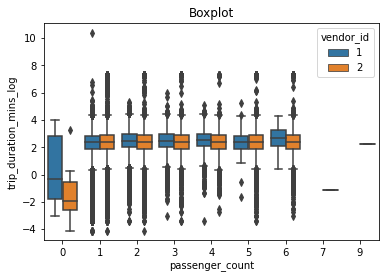

In [101]:
data['trip_duration_mins_log'] = np.log(data['trip_duration_minutes'].astype('float'))
Grouped_Box_Plot(data,'trip_duration_mins_log', 'passenger_count', 'vendor_id')

*    We should recall that passenger_count values of 0,7, and 9 will be dropped in the data preprocessing section coming up soon and, hence, we can ignore those values for analysis now. 
*    In general, we see a similar distribution of trip_duration among the rest of the non-outlier passenger_counts. If we recall from our earlier bivariate continuous-categorical analysis, we concluded that taxis with higher passenger_counts, greater than 2 but less than 7 passengers, are more likely to have higher trip durations. Moreover, we also concluded that Vendor 1 is less likely to deal with higher trip durations than Vendor 2 does and that their differences were significant. The latter hypothesis may not seem so convincing by just looking at the boxplots, but if we look closely at the whiskers and outliers, we see that trip duration values of Vendor 2 have a lot more outliers than those of Vendor 1, which must be reinforcing that relation.

### vendor_id, store_and_fwd_flag with Trip Duration

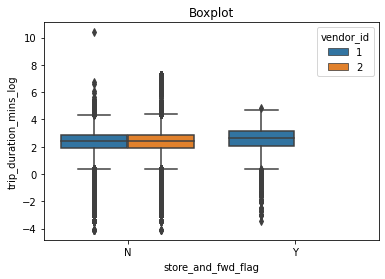

In [102]:
Grouped_Box_Plot(data,'trip_duration_mins_log', 'store_and_fwd_flag', 'vendor_id')

From our earlier categorical-categorical bivariate analysis we saw that Vendor 2 taxis did not have any values of store_and_fwd_flag = 'Y' or, in words, that Vendor 2 taxis did not store and forward trips, because the vehicle did not have a connection to the server. 

### passenger_count, store_and_fwd_flag with Trip Duration

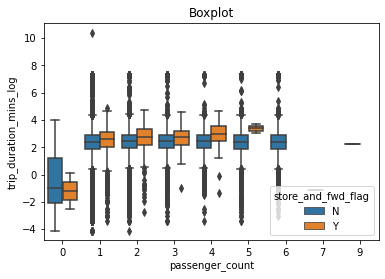

In [103]:
Grouped_Box_Plot(data,'trip_duration_mins_log', 'passenger_count', 'store_and_fwd_flag')

This boxplot supports our earlier bivariate analysis that taxis that store and forward trips, because the vehicle did not have a connection to the server, did experience higher trip duration and p-value results are significantly different too, as p-value < 0.05. Moreover, this relation is present for all non-outlier passenger count values (1-6) as seen in the boxplot and it should be noted that passenger_count value of 6 did not have any trips that did store and forward trips.

In [104]:
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,pickup_datetime_hour,pickup_datetime_woy,pickup_datetime_dow,pickup_datetime_doy,dropoff_datetime_moy,dropoff_datetime_hour,dropoff_datetime_woy,dropoff_datetime_dow,dropoff_datetime_doy,trip_duration_mins_log
0,1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,...,16,9,0,60,2,16,9,0,60,1.897120
1,0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,...,23,10,4,71,3,23,10,4,71,2.908721
2,0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,...,17,7,6,52,2,18,7,6,52,3.305054
3,3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,...,9,1,1,5,1,10,1,1,5,2.945316
4,0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,...,6,7,2,48,2,6,7,2,48,2.648536


### Outlier treatment for distance, speed, and trip_duration

From our previous Univariate as well as Bivariate analysis, we uncovered a few interesting individual as well correlated findings for these variables. We put forth a few assumptions that we can put the following limits on trip_details features:
*    **trip_duration data range can be reduced from 1 second to 3600 seconds.**
*    **distance data range could be reduced from 1 km to 40 km and speed data range can be reduced from 1 km/hr to 55 km/hr.** 
*    **These restrictions or removal of outliers in this method basically signifies that we shall be concentrating mainly on those trips within the 5 boroughs of NYC, as the data suggests, including some leeway for traffic.**

We see below that there are approx. 2844 observations now, after removing some rows before, with distance = 0 and deleting those observations would mean losing out on information that might be useful. **From the scatterplot in the Bivariate Analysis section, we concluded that it would be better to replace these distance values with their mean value (not the mean from data_cleaned but from data) rather than deleting them.**

In [112]:
data_cleaned.distance[data_cleaned.distance == 0].count()

2844

In [113]:
data_cleaned['distance'].loc[data_cleaned['distance']==0] = data.distance.mean()

In [114]:
data_cleaned['distance'].loc[data_cleaned['distance']==0].count()

0

In [115]:
data_cleaned.shape

(728160, 25)

**Therefore, as can be seen in the code above, we have successfully replaced distance=0 values with a mean value of approx. 3.1 and, simultaneously, values of speed would change too respectively.**  We shall now move ahead to remove outlier values for speed and trip_duration, which would simultaneously change trip_duration_minutes values. As discussed in the previous sections and above, **we shall reduce the trip_duration data range from 1 second to 3600 seconds. We shall also change speed values of 0 km/hr to their mean value in the original dataset and keep only those values < 55 km/hr or the citywide limit.**

In [116]:
#checking how many outlier values will be removed for trip_duration > 3600
data_cleaned.trip_duration[data_cleaned.trip_duration > 3600 ].count()

5937

In [117]:
#removing the outliers and cleaning the dataset
data_cleaned=data_cleaned[data_cleaned.trip_duration<=3600]

In [118]:
#removing trip_duration_mins_log feature as it was used only for data visualization and will not be needed anymore
data_cleaned.drop(["trip_duration_mins_log"], axis = 1, inplace = True)

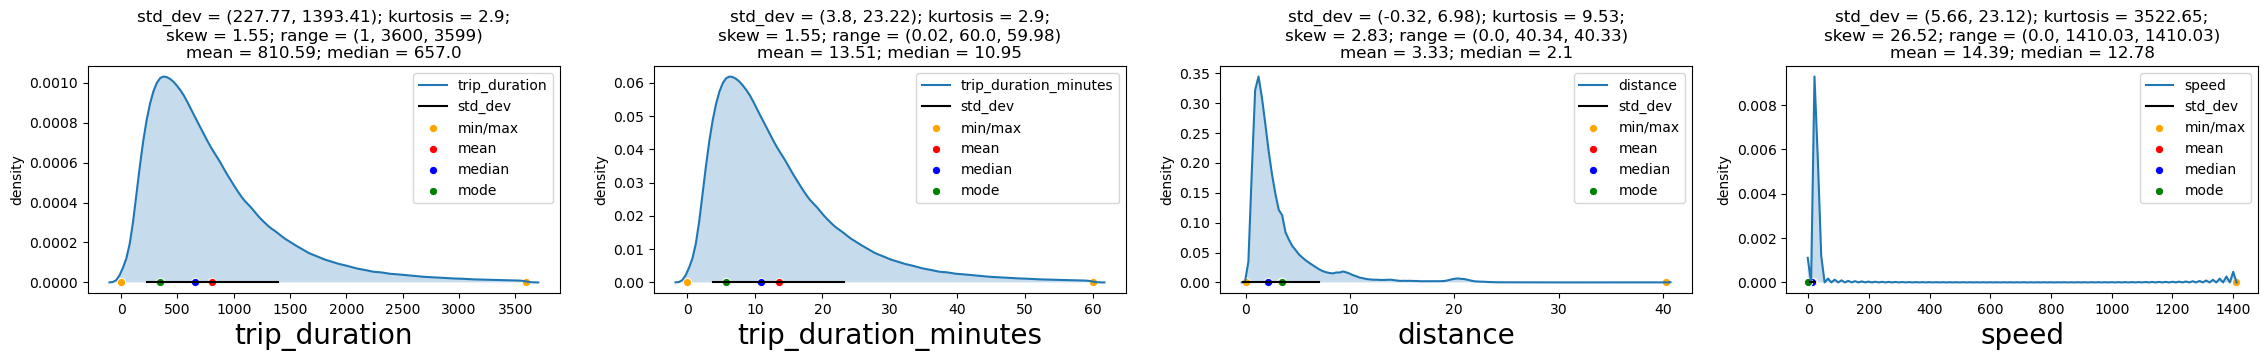

In [119]:
UVA_numeric(data_cleaned,trip_details)

In [120]:
data_cleaned.trip_duration

0          400
1         1100
2         1635
3         1141
4          848
          ... 
729317     296
729318     315
729319     673
729320     447
729321    1224
Name: trip_duration, Length: 722223, dtype: int64

In [121]:
data_cleaned.shape

(722223, 24)

In [122]:
data_cleaned.speed.describe()

count    722223.000000
mean         14.392167
std           8.729333
min           0.000000
25%           9.128261
50%          12.778296
75%          17.815131
max        1410.026691
Name: speed, dtype: float64

In [123]:
#next we shall get rid of outliers in the speed column, i.e speed > 55 and replace speed values of 0 with mean value of 14.39 km/hr
data_cleaned.speed[data_cleaned.speed > 55].count()

544

In [124]:
data_cleaned=data_cleaned[data_cleaned.speed<=55]
data_cleaned['speed'].loc[data_cleaned['speed']==0] = data.speed.mean()

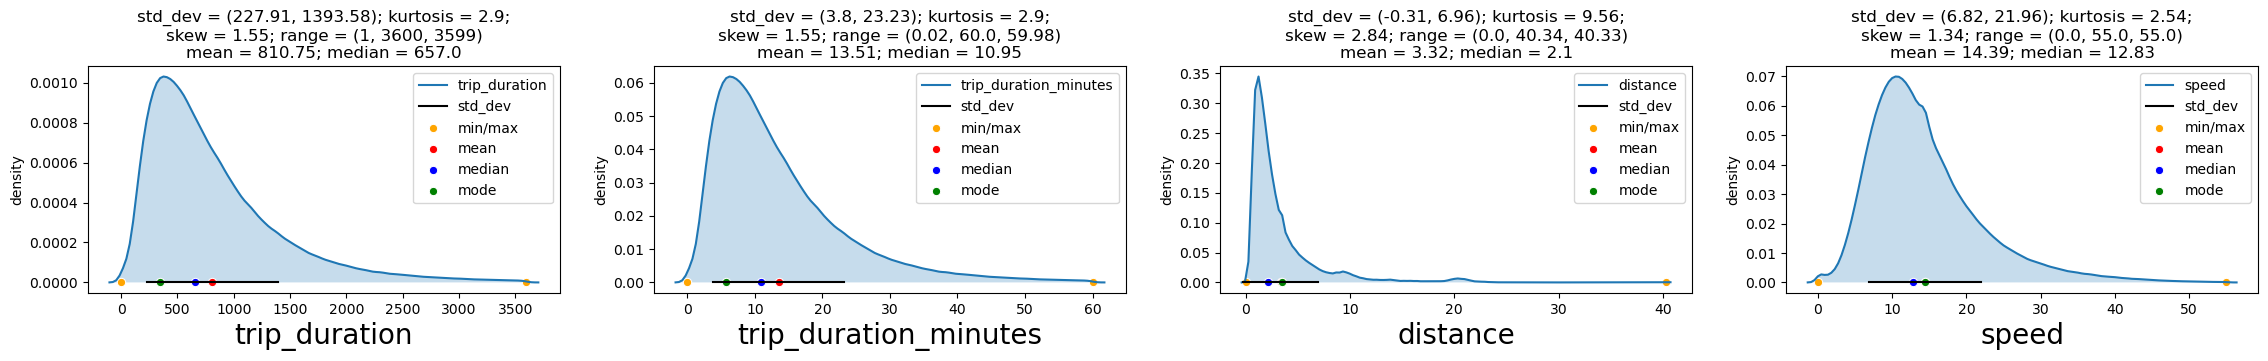

In [125]:
UVA_numeric(data_cleaned,trip_details)

In [126]:
data_cleaned['speed'].loc[data_cleaned['speed']==0].count()

0

In [127]:
(len(data)), (len(data_cleaned))

(729322, 721679)

*   Looking at the above distributions, we can say that we did a decent job on removing heavy outliers and just managed to remove a mere 7,643 values from 729,322 values. If we remember from our previous analysis of latitudes and longitudes, we put a limit to make sure distances faired well between the 5 boroughs of NYC. However, now looking at the above distribution as well as kurtosis and skewness values of distance, we do feel tempted to remove a few more outliers to make our dataset consistent. Hence, we can move ahead and just remove some more outliers by keeping a maximum limit to distance of 30 km. We shall make no more changes after this, as it would result in losing key insights from our model eventually.

In [128]:
data_cleaned=data_cleaned[data_cleaned.distance<=30]

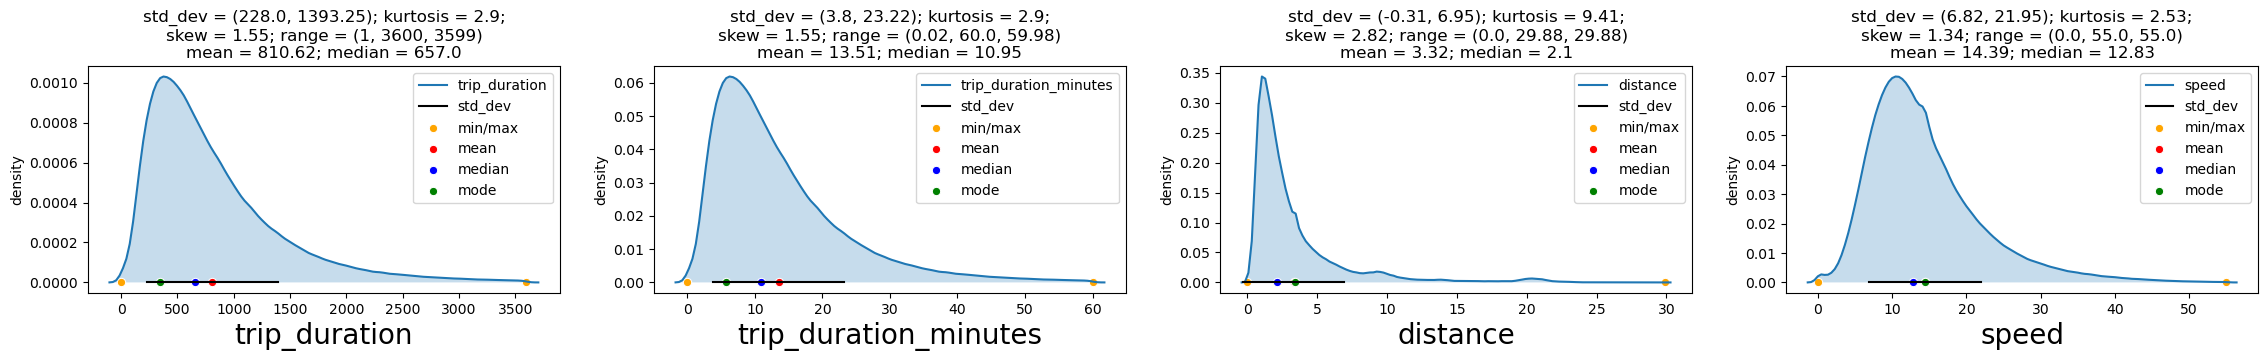

In [129]:
UVA_numeric(data_cleaned,trip_details)

In [130]:
#removing trip_duration_minutes feature too as it was used only for data visualization and will not be needed anymore
data_cleaned.drop(["trip_duration_minutes"], axis = 1, inplace = True)

In [131]:
#removing pickup_datetime and dropoff_datetime, as we have already extracted features from them 
data_cleaned.drop(["pickup_datetime", "dropoff_datetime"], axis = 1, inplace = True)

In [149]:
#removing all dropoff datetime variables, as we have already extracted features pickup datetimes features and using dropoff datetimes variables would simply lead to multicollinearity
data_cleaned.drop(["dropoff_datetime_moy", "dropoff_datetime_hour", "dropoff_datetime_woy", "dropoff_datetime_dow", "dropoff_datetime_doy"], axis = 1, inplace = True)

In [141]:
#removing id variable  
data_cleaned.drop(["id"], axis = 1, inplace = True)

In [150]:
(len(data)), (len(data_cleaned))

(729322, 721637)

In [151]:
data_cleaned.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,distance,speed,pickup_datetime_moy,pickup_datetime_hour,pickup_datetime_woy,pickup_datetime_dow,pickup_datetime_doy
count,721637.000000,721637.000000,721637.000000,721637.000000,721637.000000,721637.000000,721637.000000,721637.000000,721637.000000,721637.000000,721637.000000,721637.000000
mean,-73.974280,40.751325,-73.973838,40.752083,810.624191,3.320664,14.388676,3.514951,13.615089,13.117049,3.051353,91.774685
std,0.036190,0.027255,0.033849,0.031266,582.626757,3.629856,7.563786,1.680191,6.410425,7.349065,1.955648,51.546143
min,-74.199020,40.600216,-74.199982,40.600040,1.000000,0.000424,0.002047,1.000000,0.000000,1.000000,0.000000,1.000000
25%,-73.991905,40.737617,-73.991333,40.736256,395.000000,1.238931,9.182988,2.000000,9.000000,7.000000,1.000000,48.000000
50%,-73.981827,40.754219,-73.979797,40.754601,657.000000,2.095110,12.832771,4.000000,14.000000,13.000000,3.000000,92.000000
75%,-73.967682,40.768353,-73.963242,40.769802,1059.000000,3.800958,17.798137,5.000000,19.000000,19.000000,5.000000,136.000000
max,-73.703575,40.947769,-73.700935,40.948936,3600.000000,29.881459,54.999435,6.000000,23.000000,26.000000,6.000000,182.000000


In [152]:
data_cleaned.dtypes

vendor_id               category
passenger_count         category
pickup_longitude         float64
pickup_latitude          float64
dropoff_longitude        float64
dropoff_latitude         float64
store_and_fwd_flag      category
trip_duration              int64
distance                 float64
speed                    float64
pickup_datetime_moy        int64
pickup_datetime_hour       int64
pickup_datetime_woy        int64
pickup_datetime_dow        int64
pickup_datetime_doy        int64
dtype: object

In [153]:
data_cleaned.shape

(721637, 15)

*   **This brings us to the end of our data preprocessing section and we can now focus on model building with our cleaned data!**